<a href="https://colab.research.google.com/github/Mansi67/Predictive-Maintenance-Binary-Classification/blob/main/Machine_Failures_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Binary Classification of Machine Failures (Predictive Maintenance)


##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Contributor**     - Mansi Srivastava

# **Project Summary -**


#### **Introduction**

This project focuses on predicting machine failures using machine learning models, with a primary objective to enhance predictive maintenance in industrial settings. Predictive maintenance, which is crucial for minimizing downtime and optimizing machine performance, relies on data-driven insights to preemptively address potential failures. In this project, we leveraged advanced machine learning algorithms and innovative feature engineering techniques to develop a predictive model capable of accurately forecasting machine failure conditions.

#### **Dataset and Initial Analysis**

The dataset used for this project contained various features related to machine operations, including:

- **Air Temperature [K]**
- **Process Temperature [K]**
- **Rotational Speed [rpm]**
- **Torque [Nm]**
- **Tool Wear [min]**
- **Machine Failure Modes (TWF, HDF, PWF, OSF, RNF)**

Each failure mode represents a specific type of machine malfunction, providing a granular perspective on the conditions leading to failures. Initially, the data was explored to understand the distribution of features, correlations, and potential anomalies. This exploration provided insights into the complex relationships between various operational parameters and failure outcomes.

#### **Feature Engineering**

Feature engineering played a pivotal role in this project, transforming raw data into meaningful features that could enhance model performance. We derived several new features, such as:

- **Power**: Calculated using the formula \( \text{Power} = \text{Torque} \times \left( \text{Rotational Speed} \times \frac{2 \pi}{60} \right) \)
- **Temperature Difference**: \( \text{Process Temperature} - \text{Air Temperature} \)
- **Interaction Terms**: Products and ratios of features like power, temperature difference, rotational speed, etc.

These engineered features aimed to capture the complex interactions and dynamics within machine operations, providing a richer dataset for the models to learn from.

#### **Model Selection and Hyperparameter Tuning**

We employed a stacking ensemble approach, combining three powerful models: LightGBM, Balanced Random Forest (BRF), and CatBoost. Each model has unique strengths, with LightGBM offering fast training speed and high efficiency, BRF addressing class imbalance, and CatBoost handling categorical features effectively.

Hyperparameter tuning was conducted using Optuna, a sophisticated optimization framework, to fine-tune each model's parameters. This process involved exploring a wide range of hyperparameters to identify the optimal settings for maximizing performance. The best parameters were saved and used for final model training.

#### **Model Training and Evaluation**

The final model was trained on the preprocessed and feature-engineered dataset. We utilized metrics such as Accuracy, Precision, Recall, F1 Score, and ROC AUC to evaluate the model's performance:

- **LightGBM**:
  - Accuracy: 0.994
  - Precision: 1.000
  - Recall: 0.828
  - F1 Score: 0.906
  - ROC AUC: 0.978

- **Balanced Random Forest**:
  - Accuracy: 0.9935
  - Precision: 1.000
  - Recall: 0.814
  - F1 Score: 0.898
  - ROC AUC: 0.987

- **CatBoost**:
  - Accuracy: 0.992
  - Precision: 0.935
  - Recall: 0.829
  - F1 Score: 0.879
  - ROC AUC: 0.988

- **Stacking Model**:
  - Accuracy: 0.994
  - Precision: 1.000
  - Recall: 0.828
  - F1 Score: 0.906
  - ROC AUC: 0.988

The stacking ensemble model demonstrated superior performance, effectively capturing the intricacies of machine failure dynamics. Its high recall and precision ensured that potential failures were accurately predicted, reducing the risk of false positives and negatives.

#### **Predictive Functionality and Practical Application**

To facilitate real-world application, we developed a user-friendly prediction function that accepts new operational inputs and forecasts potential failures. This function allows operators to enter parameters such as temperature, speed, torque, and tool wear, enabling timely interventions and maintenance scheduling.

Furthermore, the entire workflow, including preprocessing, feature engineering, and prediction, was encapsulated within a scalable pipeline. This design ensures seamless integration into existing industrial systems, supporting real-time monitoring and decision-making.

#### **Conclusion**

This project successfully demonstrated the potential of machine learning models to revolutionize predictive maintenance in industrial settings. By harnessing advanced algorithms and innovative feature engineering, we developed a robust predictive tool that can significantly enhance operational efficiency and safety. Future work may involve integrating real-time data feeds and exploring adaptive learning techniques to further refine the model's predictive capabilities. This approach sets the foundation for more intelligent, data-driven maintenance strategies, paving the way for smarter industrial operations.

# **GitHub Link -**

https://github.com/Mansi67/Predictive-Maintenance-Binary-Classification

# **Problem Statement**


The goal of this project is to develop a predictive model that identifies potential machine failures in a milling process using a synthetic dataset with 10,000 data points. Each entry captures a unique instance of machine operation with 14 features, including identifiers, product quality (Low, Medium, High), operational parameters like air and process temperatures, rotational speed, torque, and tool wear.

The dataset also includes a 'machine failure' label, indicating failure modes such as tool wear failure, heat dissipation failure, power failure, overstrain failure, and random failures.

These failures can occur independently or simultaneously, affecting overall machine efficiency. The objective is to leverage this data to predict machine failures accurately, thereby enabling preventive maintenance and minimizing downtime. By building a reliable machine learning model, manufacturers can enhance operational efficiency, reduce costs, and improve the reliability of milling operations.

# **Let's Begin**

## **Import Libraries**

In [1]:
!pip install catboost
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 3.5 MB/s eta 0:00:00


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
import math

from google.colab import drive
drive.mount('/content/drive')

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek

import itertools

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

from sklearn.feature_selection import RFE

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.svm import SVC

import optuna

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Load data**

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Predictive Maintenance/ai4i2020.csv')

## **Know your Data**

In [4]:
print(f"Dataset :\nRows: {df.shape[0]}\nColumns: {df.shape[1]}")

Dataset :
Rows: 10000
Columns: 14


In [5]:
print("Info of dataset:")
print("\n")
print(df.info())

Info of dataset:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: f

The dataset has zero null values.

In [6]:
df.sample(3)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
2982,2983,L50162,L,300.5,309.5,1795,27.7,117,0,0,0,0,0,0
4043,4044,M18903,M,302.0,310.8,1445,46.3,17,0,0,0,0,0,0
4716,4717,L51896,L,303.4,311.6,1712,30.1,182,0,0,0,0,0,0


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0
TWF,10000.0,0.00460,0.067671,0.0,0.00,0.0,0.00,1.0
HDF,10000.0,0.01150,0.106625,0.0,0.00,0.0,0.00,1.0
PWF,10000.0,0.00950,0.097009,0.0,0.00,0.0,0.00,1.0



---

**Dataset Summary Statistics :**

- **UDI**: Sequential index from 1 to 10,000.
- **Air Temperature [K]**: Average is 300.00 K with a narrow range from 295.3 K to 304.5 K, indicating consistent conditions.
- **Process Temperature [K]**: Mean is 310.01 K, ranging between 305.7 K and 313.8 K.
- **Rotational Speed [rpm]**: Mean is 1538.78 rpm, spanning from 1168 rpm to 2886 rpm, reflecting varied operating speeds.
- **Torque [Nm]**: Mean torque is 39.99 Nm, ranging from 3.8 Nm to 76.6 Nm.
- **Tool Wear [min]**: Average wear is 107.95 min, with significant variability (0 to 253 min).
- **Machine Failure**: Very low average of 0.0339, indicating few failures.
- **TWF, HDF, PWF, OSF, RNF**: All failure modes have means close to zero, indicating rare occurrences.


---

### **Variables Description:**

---
According to the documentation of the AI4I 2020 Predictive Maintenance Dataset

- **Type:** consisting of a letter L, M, or H for low, medium and high as product quality variants.
- **air temperature [K]**: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K.
- **process temperature [K]:** generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
- **rotational speed [rpm]:** calculated from a power of 2860 W, overlaid with a normally distributed noise.
- **torque [Nm]:** torque values are normally distributed around 40 Nm with a Ïƒ  = 10 Nm and no negative values.
- **tool wear [min]:** The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process.
- **machine failure:** whether the machine has failed in this particular datapoint for any of the following failure modes are true.

**The machine failure consists of five independent failure modes**

- **tool wear failure (TWF):** the tool will be replaced of fail at a randomly selected tool wear time between 200 ~ 240 mins.
- **heat dissipation failure (HDF):** heat dissipation causes a process failure, if the difference between air and process temperature is below 8.6 K and the rotational speed is below 1380 rpm.
- **power failure (PWF):** the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails.
- **overstrain failure (OSF):** if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain.
- **random failures (RNF):** each process has a chance of 0.1 % to fail regardless of its process parameters.

`If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1.`

---

### **Rename Columns**

 ---
 Special characters or brackets in column names can sometimes cause issues with data processing libraries or operations. Removing these characters ensures smoother data manipulation.

 ---

In [8]:
# Column renaming mapping
rename_mapping = {
    'Air temperature [K]': 'Air_Temperature',
    'Process temperature [K]': 'Process_Temperature',
    'Rotational speed [rpm]': 'Rotational_Speed',
    'Torque [Nm]': 'Torque',
    'Tool wear [min]': 'Tool_Wear',
    'Product ID':'Product_ID',
    'Machine failure':'Machine_Failure'
}

# Rename columns
df.rename(columns=rename_mapping, inplace=True)

## **Dataset Validation**


---
We are looking for rows with inconsistencies, such as cases where a machine failure is reported without any of the known failure modes being triggered, or where a machine failure is not reported despite one or more failure modes being triggered. Any identified inconsistencies will be corrected before proceeding with further analysis.

---

### **Initial Dataset:**

In [9]:
df['Machine_Failure'].value_counts()

,count
Machine_Failure,
0,9661
1,339


### **Condition 1:**

In [10]:
# 1. Identify rows where 'Machine_Failure' is 0 but at least one failure mode is 1
condition_1 = df[(df['Machine_Failure'] == 0) &
                  ((df['TWF'] == 1) |
                   (df['HDF'] == 1) |
                   (df['PWF'] == 1) |
                   (df['OSF'] == 1) |
                   (df['RNF'] == 1))]

# 2. Count and display the number of inconsistent rows
num_inconsistent_rows = condition_1.shape[0]
print(f"Number of rows with 'Machine_Failure' = 0 but failure modes triggered: {num_inconsistent_rows}")

#print(condition_1)
# 3. Correct the 'Machine_Failure' status to 1 for the identified rows
df.loc[condition_1.index, 'Machine_Failure'] = 1

# 4. Print the number of corrected rows
print(f"Number of rows where 'Machine_Failure' was corrected: {num_inconsistent_rows}")


Number of rows with 'Machine_Failure' = 0 but failure modes triggered: 18
Number of rows where 'Machine_Failure' was corrected: 18


---
According to variables description each process has a chance of **0.1 %** to fail regardless of its process parameters. Therefore, we will replace Machine_Failure values in this case to 1 as RNF is True.

---

### **Condition 2:**

In [11]:
# Identifying rows where 'Machine_Failure' is 1 but all failure modes are 0
condition_2 = df[
    (df['Machine_Failure'] == 1) &
    ((df['TWF'] == 0) &
     (df['HDF'] == 0) &
     (df['PWF'] == 0) &
     (df['OSF'] == 0) &
     (df['RNF'] == 0))
]

# Number of inconsistent rows in the second condition
print(f"Number of rows with 'Machine_Failure' = 1 but no failure modes triggered: {condition_2.shape[0]}")


Number of rows with 'Machine_Failure' = 1 but no failure modes triggered: 9


---
In this case, we need to carefully observe process parameters.

**tool wear failure (TWF):** the tool will be replaced of fail at a randomly selected tool wear time between 200 ~ 240 mins.

**heat dissipation failure (HDF):** heat dissipation causes a process failure, if the difference between air and process temperature is below 8.6 K and the rotational speed is below 1380 rpm.

**power failure (PWF):** the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails.

**overstrain failure (OSF):** if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain.

**random failures (RNF):** each process has a chance of 0.1 % to fail regardless of its process parameters.

---

In [12]:
# Define the failure checking functions
def check_TWF(tool_wear):
    return 1 if 200 < tool_wear < 240 else 0

def check_HDF(air_temp, process_temp, rotational_speed):
    temp_diff = process_temp - air_temp
    return 1 if temp_diff < 8.6 and rotational_speed < 1380 else 0

def check_PWF(torque, rotational_speed):
    rotational_speed_rad_s = rotational_speed * (2 * np.pi / 60)
    calculated_power = torque * rotational_speed_rad_s
    return 1 if calculated_power < 3500 or calculated_power > 9000 else 0

def check_OSF(tool_wear, torque, type_variant):
    thresholds = {'L': 11000, 'M': 12000, 'H': 13000}
    threshold = thresholds.get(type_variant, 11000)  # Default to 11000 if type is not in thresholds
    return 1 if tool_wear * torque > threshold else 0


# Apply the functions only to rows present in condition_2
df.loc[condition_2.index, 'TWF'] = condition_2['Tool_Wear'].apply(check_TWF)
df.loc[condition_2.index, 'HDF'] = condition_2.apply(lambda row: check_HDF(row['Air_Temperature'], row['Process_Temperature'], row['Rotational_Speed']), axis=1)
df.loc[condition_2.index, 'PWF'] = condition_2.apply(lambda row: check_PWF(row['Torque'], row['Rotational_Speed']), axis=1)
df.loc[condition_2.index, 'OSF'] = condition_2.apply(lambda row: check_OSF(row['Tool_Wear'], row['Torque'], row['Type']), axis=1)



Check again ...

In [13]:
condition_2 = df[
    (df['Machine_Failure'] == 1) &
    ((df['TWF'] == 0) &
     (df['HDF'] == 0) &
     (df['PWF'] == 0) &
     (df['OSF'] == 0) &
     (df['RNF'] == 0))
]

# Number of inconsistent rows in the second condition
print(f"Checking again for number of rows with 'Machine_Failure' = 1 but no failure modes triggered: {condition_2.shape[0]}")



Checking again for number of rows with 'Machine_Failure' = 1 but no failure modes triggered: 8


In [14]:
# Correcting Machine_Failure=0 in condition_2
df.loc[condition_2.index,'Machine_Failure']=0

### **After Data Validation:**

In [15]:
df["Machine_Failure"].value_counts()

,count
Machine_Failure,
0,9651
1,349


## **Exploratory Data Analysis & Visualizations**

In [16]:
df['Machine_Failure'].value_counts()

,count
Machine_Failure,
0,9651
1,349


### **Features**

In [17]:
df.columns

Index(['UDI', 'Product_ID', 'Type', 'Air_Temperature', 'Process_Temperature',
       'Rotational_Speed', 'Torque', 'Tool_Wear', 'Machine_Failure', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [18]:
numeric_features=['Air_Temperature', 'Process_Temperature', 'Rotational_Speed', 'Torque', 'Tool_Wear']
cat_features=['Product_ID', 'Type']
bin_features=['TWF', 'HDF', 'PWF','OSF','RNF']
target=['Machine_Failure']

### **Missing Values**

In [19]:
def check_missing_values(df):
    # Calculate the number of missing values per column
    missing_counts = df.isna().sum()

    # Filter out columns with no missing values
    missing_counts = missing_counts[missing_counts > 0]

    # Check if there are any missing values
    if missing_counts.empty:
        print("No Missing Values in Dataset")
    else:
        for col, count in missing_counts.items():
            print(f'Missing Values in {col}: {count}')
check_missing_values(df)

No Missing Values in Dataset


### **Duplicate Values**

In [20]:
print(f"Duplicated Rows in dataset: {df.duplicated().sum()}")


Duplicated Rows in dataset: 0


### **Unique Values in Dataset**

In [21]:
def unique_values(df):
  for col in df.columns:
    print(f"Number of unique values in {col}: {df[col].nunique()}")

unique_values(df)


Number of unique values in UDI: 10000
Number of unique values in Product_ID: 10000
Number of unique values in Type: 3
Number of unique values in Air_Temperature: 93
Number of unique values in Process_Temperature: 82
Number of unique values in Rotational_Speed: 941
Number of unique values in Torque: 577
Number of unique values in Tool_Wear: 246
Number of unique values in Machine_Failure: 2
Number of unique values in TWF: 2
Number of unique values in HDF: 2
Number of unique values in PWF: 2
Number of unique values in OSF: 2
Number of unique values in RNF: 2


### **Visual Analysis:**

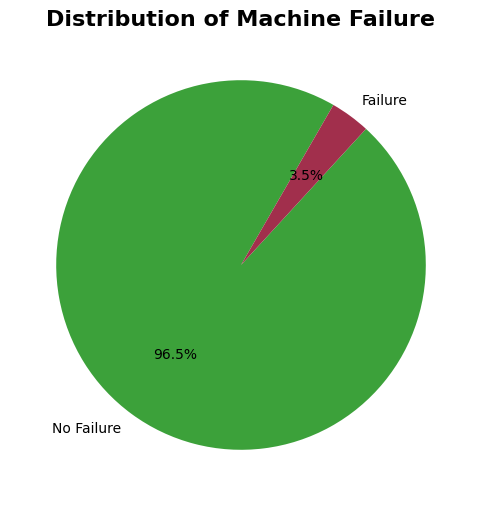

In [22]:
# Define labels and colors
labels = ['No Failure', 'Failure']
sizes = df['Machine_Failure'].value_counts().values
colors = ['#3CA13A','#A12F4C',  ]

# Create the pie chart
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=60)
plt.title('Distribution of Machine Failure', fontsize=16, fontweight='bold')
plt.show()

---
The pie chart shows that 96.5% of products do not fail, while 3.5% of machines do fail. This suggests that the data is highly imbalanced.

---

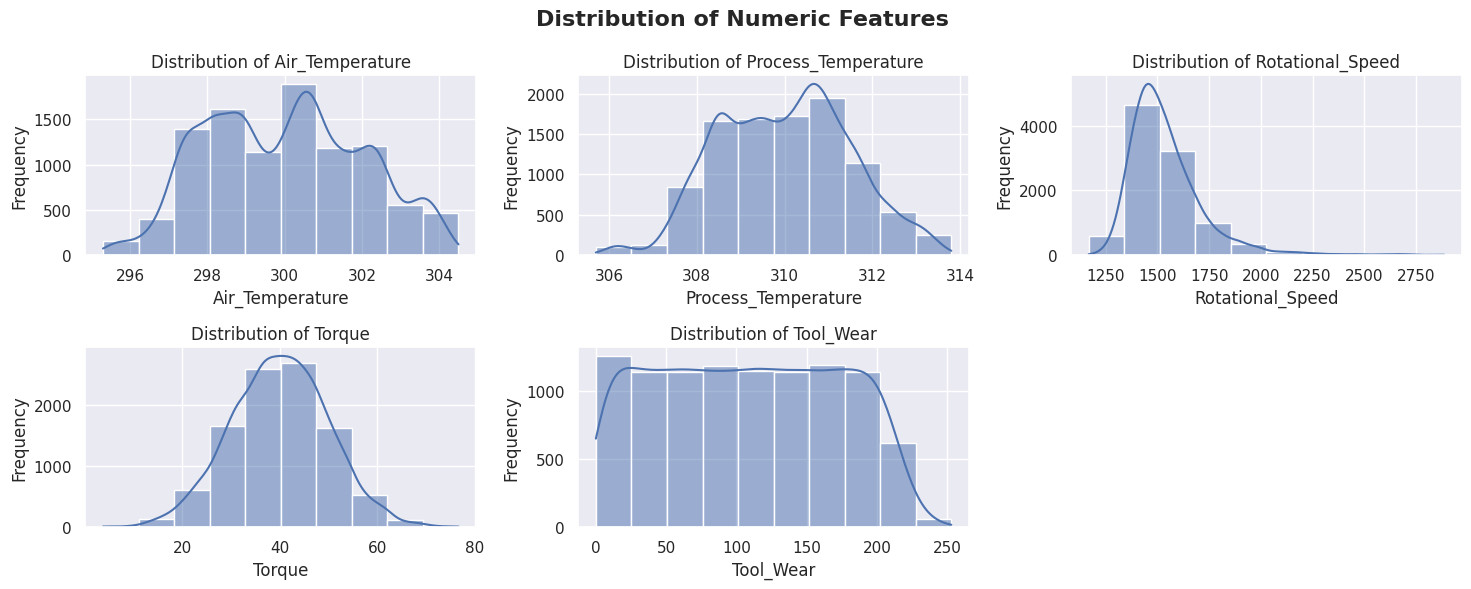

In [23]:
# Set the style of the plots
sns.set(style='darkgrid')

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 6))
axes = axes.flatten()

# Plot histograms
for i, feature in enumerate(numeric_features):
    sns.histplot(df[feature], bins=10, kde=True, ax=axes[i],)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_ylabel('Frequency')

# Set a title for the entire figure
fig.suptitle('Distribution of Numeric Features', fontsize=16, fontweight='bold')
# Adjust layout
plt.tight_layout()
plt.delaxes(axes[5])  # Remove the empty subplot (last one)
plt.show()

---
**Distribution of Numeric Features**

This graph displays the frequency distributions of five numeric features in the dataset, highlighting their unique patterns:

1. **Air Temperature (Kelvin)**
   - **Range:** 296 to 304
   - **Distribution:** Multimodal
   - **Insights:** Multiple peaks suggest varying operational conditions or external factors affecting air temperature.

2. **Process Temperature (Kelvin)**
   - **Range:** 306 to 314
   - **Distribution:** Multimodal
   - **Insights:** Similar to air temperature, indicating different phases in the manufacturing process.

3. **Rotational Speed (rpm)**
   - **Range:** 1250 to 2750
   - **Distribution:** Right-skewed
   - **Insights:** Concentration at lower speeds, suggesting preferred operational settings.

4. **Torque (Nm)**
   - **Range:** 20 to 80
   - **Distribution:** Normal
   - **Insights:** Indicates consistent and controlled variations in torque, centering around 40.

5. **Tool Wear (min)**
   - **Range:** 0 to 250
   - **Distribution:** Varied with multiple peaks
   - **Insights:** Reflects different wear levels, possibly due to varying tool usage or maintenance.

---

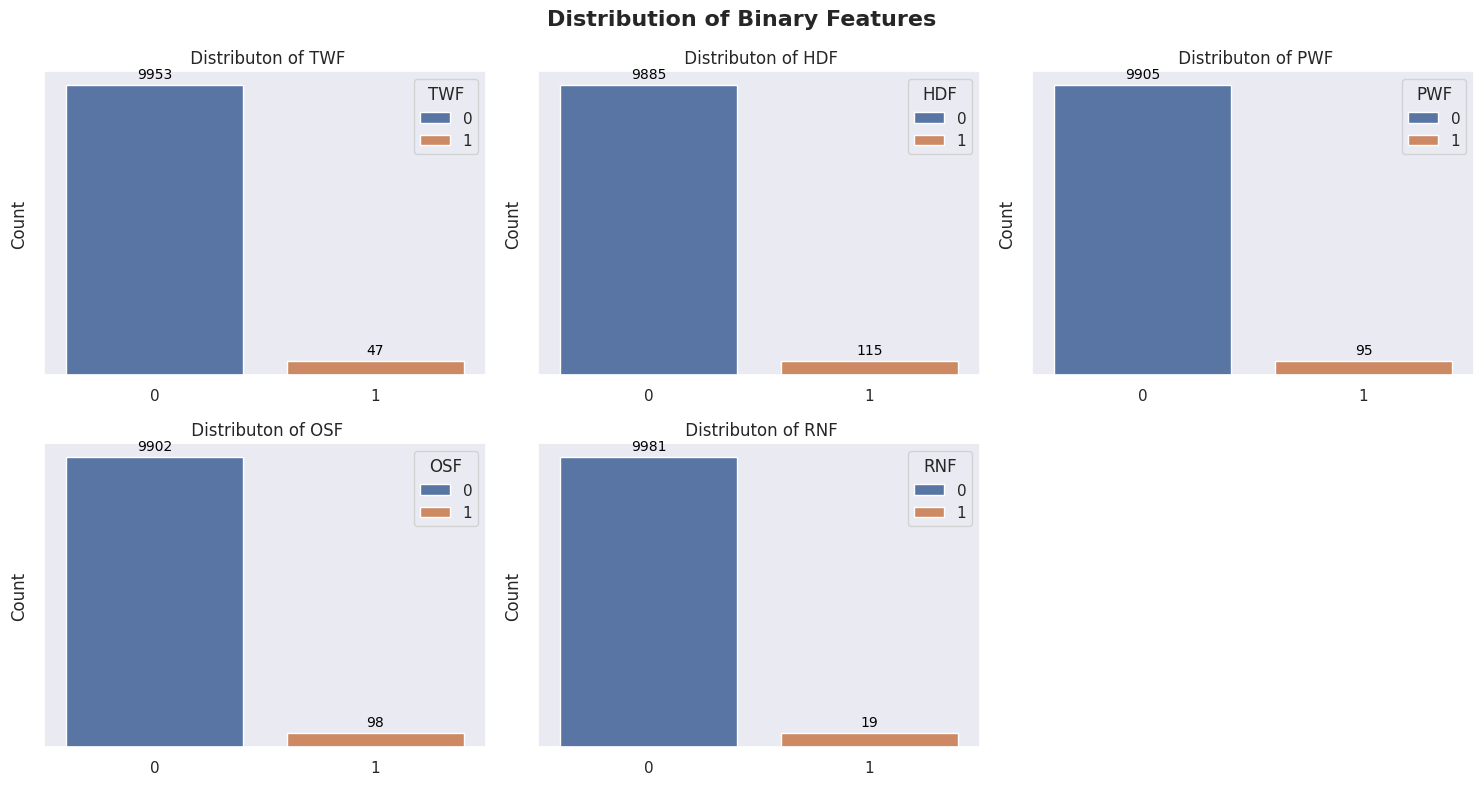

In [24]:
fig,axes=plt.subplots(nrows=2, ncols=3, figsize=(15,8))
axes=axes.flatten()

#Plot Countplots
for i, feature in enumerate(bin_features):
  sns.countplot(data=df, x=feature,hue=feature, ax=axes[i])
  axes[i].set_title(f" Distributon of {feature}")
  axes[i].set_ylabel('Count')
  axes[i].set_xlabel('')
  axes[i].set_yscale('log')# Use a logarithmic scale to visualize small values better
  axes[i].set_yticks([]) #Hide y axis values
  # Annotate the bars with counts
  for p in axes[i].patches:
    count = int(p.get_height())
    axes[i].annotate(f'{count}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                         textcoords='offset points')


#SEt a title for entire figure
fig.suptitle('Distribution of Binary Features', fontsize=16, fontweight='bold')
# Remove the unused subplot (the last one, in this case)
fig.delaxes(axes[-1])

#Adjust Layout
plt.tight_layout()
plt.show()

---
**Most Frequent Failure:** Heat Dissipation Failure (HDF) is the most frequent, indicating a critical area for improvement.

**Least Frequent Failure:** Random Failure (RNF) is the least frequent, suggesting it is less of a concern compared to other failure modes.

---

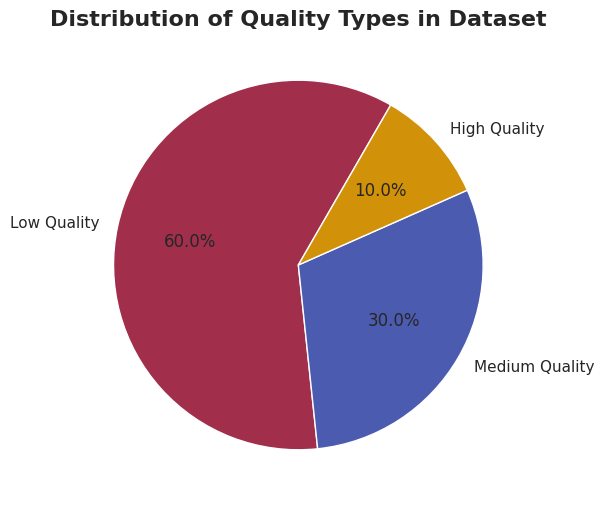

In [25]:
# Define labels and colors
labels = ['Low Quality', 'Medium Quality', 'High Quality']
sizes = df['Type'].value_counts().values
colors = ['#A12F4C', '#4B5BB0', '#D19109']  # Customize as needed

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=60)
plt.title('Distribution of Quality Types in Dataset', fontsize=16, fontweight='bold')
plt.show()

---
The majority of the data, 60%, falls under the "Low" quality category. The "Medium" quality type accounts for 30% of the data, while the "High" quality type represents a smaller portion at 10%. This suggests that the training dataset primarily consists of data of machines with low quality, followed by medium quality, with a relatively small proportion of high-quality data.

---

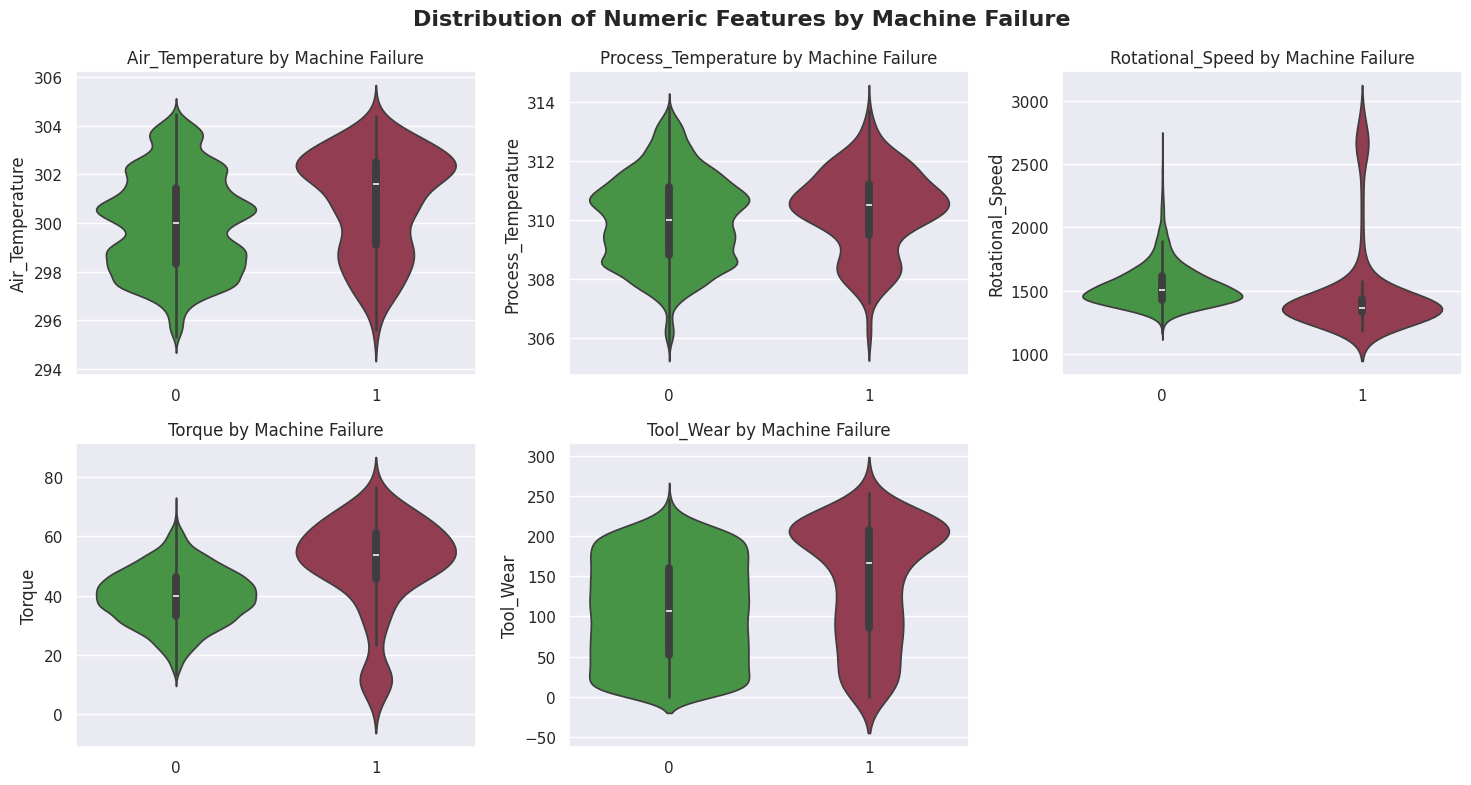

In [26]:
# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

# Plot histograms
for i, feature in enumerate(numeric_features):
    sns.violinplot(x='Machine_Failure', y=feature, data=df, ax=axes[i],hue='Machine_Failure',palette={0: '#3CA13A', 1: '#A12F4C'})
    axes[i].set_title(f'{feature} by Machine Failure')
    axes[i].set_ylabel(feature)
    axes[i].set_xlabel('')
    axes[i].legend().set_visible(False)  # Hide the legend if it appears

# Set a title for the entire figure
fig.suptitle('Distribution of Numeric Features by Machine Failure', fontsize=16, fontweight='bold')
# Adjust layout
plt.tight_layout()
plt.delaxes(axes[-1])  # Remove the empty subplot (last one)
plt.show()

---
Overall, the violin plots suggest that higher temperatures, higher torque, higher tool wear, and both very high and very low rotational speeds might be associated with an increased risk of machine failure. Further analysis would be needed to confirm these relationships and to understand the specific mechanisms by which these factors might contribute to failure.

---

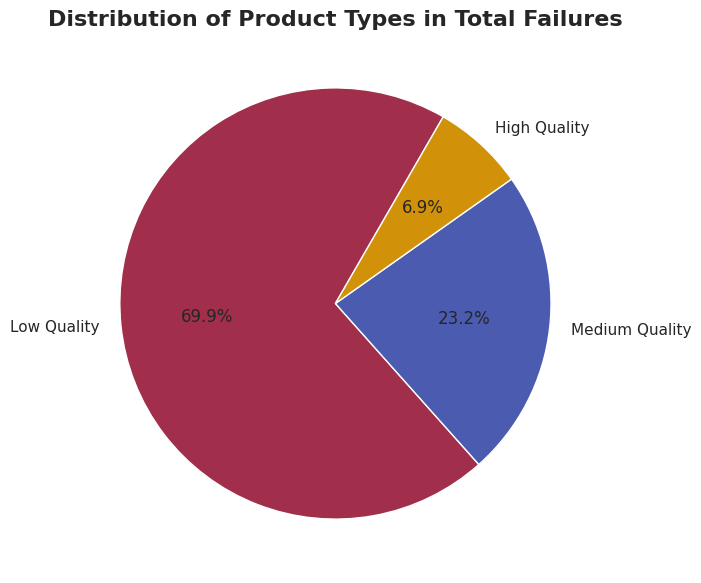

In [27]:
total_failures=df[df['Machine_Failure']==1]['Type'].value_counts()
labels=['Low Quality', 'Medium Quality', 'High Quality']
colors = ['#A12F4C', '#4B5BB0', '#D19109']
# Plot pie chart
plt.figure(figsize=(10, 7))
plt.pie(total_failures.values, labels=labels, autopct='%1.1f%%', startangle=60, colors=colors)
plt.title('Distribution of Product Types in Total Failures', fontsize=16, fontweight='bold')
plt.show()

---
The majority of failures are from low quality products (69.9%), followed by medium quality products (23.2%) and high quality products (6.9%).

---

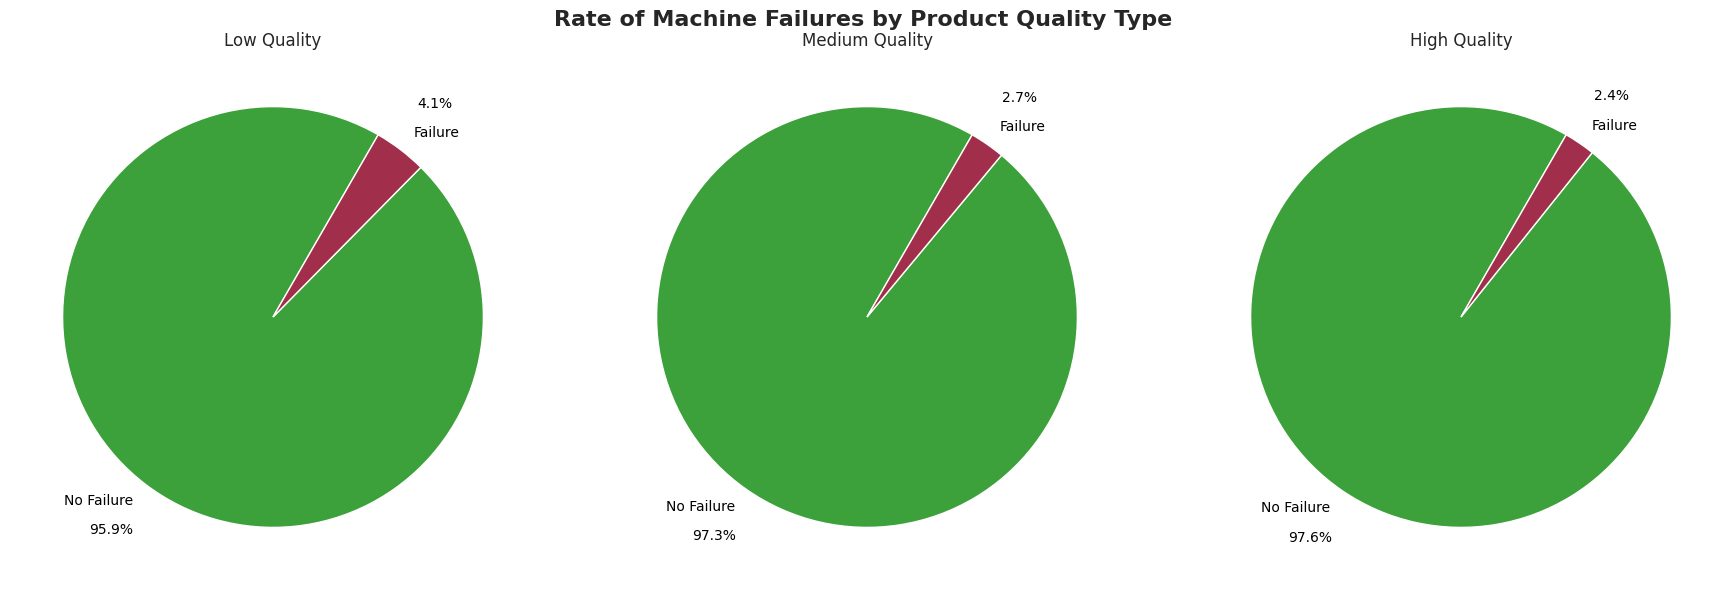

In [28]:
# Visualising Rate of Machine Failure in different quality  of machines
low_quality_mf=df[df['Type']=='L']['Machine_Failure'].value_counts()
med_quality_mf=df[df['Type']=='M']['Machine_Failure'].value_counts()
high_quality_mf=df[df['Type']=='H']['Machine_Failure'].value_counts()

# Define labels and colors
labels = ['No Failure', 'Failure']
colors = ['#3CA13A', '#A12F4C']

# Define text properties for percentage labels
textprops = {'fontsize': 10, 'color': 'black'}

# Set up the matplotlib figure
plt.figure(figsize=(18, 6))

# Create pie chart for low quality
plt.subplot(1, 3, 1)
plt.pie(low_quality_mf.values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=60, pctdistance=1.27,textprops=textprops)
plt.title('Low Quality')

# Create pie chart for medium quality
plt.subplot(1, 3, 2)
plt.pie(med_quality_mf.values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=60, pctdistance=1.27, textprops=textprops)
plt.title('Medium Quality')

# Create pie chart for high quality
plt.subplot(1, 3, 3)
plt.pie(high_quality_mf.values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=60, pctdistance=1.27, textprops=textprops)
plt.title('High Quality')

# Add a suptitle
plt.suptitle('Rate of Machine Failures by Product Quality Type ', fontsize=16, fontweight='bold',)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

 ---
 As can be seen, the failure rate is highest for low-quality products, followed by medium-quality products. The failure rate for high-quality products is the lowest. This suggests that the quality of the product has a significant impact on the likelihood of machine failure.

 ---

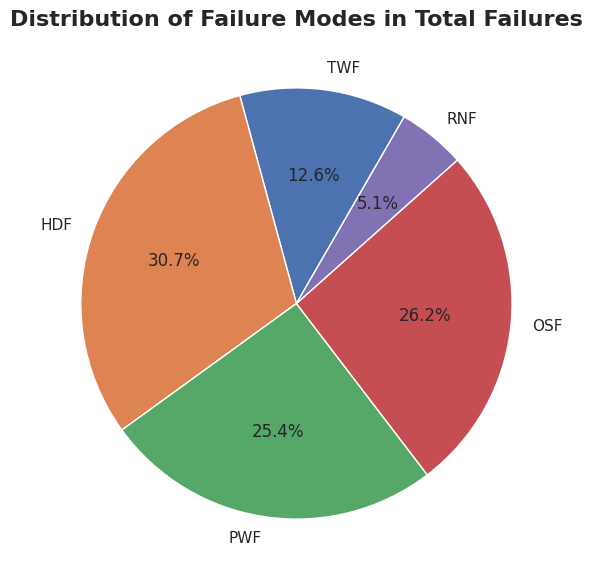

In [29]:
# Calculate total counts for each failure mode
total_failures = {
    'TWF': df[(df['Machine_Failure']==1) & (df['TWF'] == 1)].shape[0],
    'HDF': df[(df['Machine_Failure']==1) & (df['HDF'] == 1)].shape[0],
    'PWF': df[(df['Machine_Failure']==1) & (df['PWF'] == 1)].shape[0],
    'OSF': df[(df['Machine_Failure']==1) & (df['OSF'] == 1)].shape[0],
    'RNF': df[(df['Machine_Failure']==1) & (df['RNF'] == 1)].shape[0],
}

# Plot pie chart
plt.figure(figsize=(10, 7))
plt.pie(total_failures.values(), labels=total_failures.keys(), autopct='%1.1f%%', startangle=60)
plt.title('Distribution of Failure Modes in Total Failures', fontsize=16, fontweight='bold')
plt.show()

---
- The most common failure mode is **HDF (Heat Dissipation Failure)**, accounting for 30.7% of all failures.

- The second most common failure mode is **OSF (Overstrain Failure)**, accounting for 26.2% of all failures.

- **PWF (Power Failure)** accounts for 25.4% of all failures.

- **TWF (Tool Wear Failure)** accounts for 12.6% of all failures.

- **RNF (Random Failures)** accounts 5.1% of all failures.


This data suggests that heat dissipation and overstrain are the most significant factors contributing to process failures.

---

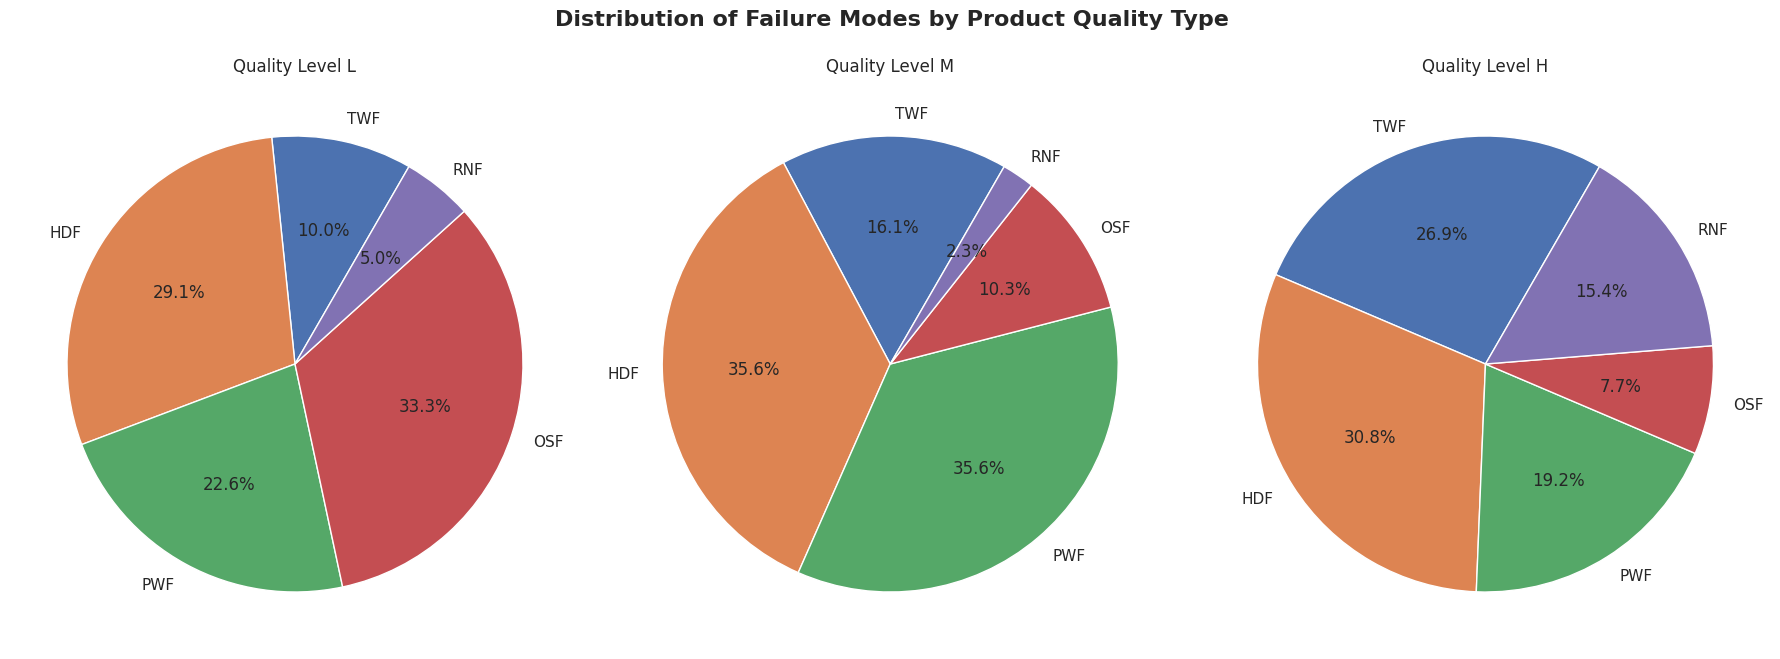

In [30]:
frame=df[df['Machine_Failure']==1].groupby('Type').agg(
    {'TWF':'sum',
     'HDF':'sum',
     'PWF':'sum',
     'OSF':'sum',
     'RNF':'sum'
    }
).reset_index()
# List of quality levels
quality_levels = ['L', 'M', 'H']

fig, axes = plt.subplots(1, 3, figsize=(18, 7))

# Plot pie charts for each quality level
for i, quality in enumerate(quality_levels):
    # Filter data for the current quality level
    data = frame[frame['Type'] == quality]

    # Prepare data for the pie chart
    values = data.iloc[0, 1:]  # Sum values of 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'
    labels = values.index  # Feature names

    # Plot pie chart
    axes[i].pie(values, labels=labels, autopct='%1.1f%%', startangle=60,)
    axes[i].set_title(f'Quality Level {quality}')

# Adjust layout to make room for the labels
plt.suptitle('Distribution of Failure Modes by Product Quality Type', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

---

**Low quality**
- **OSF (33.3%)**: Most frequent, indicating overstrain issues.
- **HDF (29.1%)**: Critical factor due to heat dissipation.
- **PWF (22.6%)**: Significant due to power management.
- **TWF (10%)**: Notable for tool wear impact.
- **RNF (5.0%)**: Least common, minor impact.

**Medium quality**
- **HDF (35.6%)**: Most common, heat dissipation crucial.
- **PWF (35.6%)**: Equally significant, power management vital.
- **TWF (16.1%)**: Considerable factor for tool wear.
- **OSF (10.3%)**: Reduced overstrain issues.
- **RNF (2.3%)**: Minor concern.

**High Quality**
- **HDF (30.8%)**: Most frequent, heat dissipation still critical.
- **TWF (26.9%)**: Major factor, tool wear significant.
- **PWF (19.2%)**: Important for power management.
- **RNF (15.4%)**: More prevalent but still less impactful.
- **OSF (7.7%)**: Least common, overstrain issues minimal.

**Comparative Summary:**

- HDF is consistently a significant factor across all quality levels, indicating that heat dissipation issues are critical irrespective of quality.
- PWF is also a major factor in all quality categories, highlighting its importance for power management.
- TWF becomes more prominent as quality improves, suggesting its increasing impact on tool wear with higher quality.
- OSF decreases in significance with higher quality, reflecting reduced overstrain issues in better quality levels.
- RNF is the least impactful across all quality levels but shows an increase in significance as quality improves, though it remains relatively minor.

---

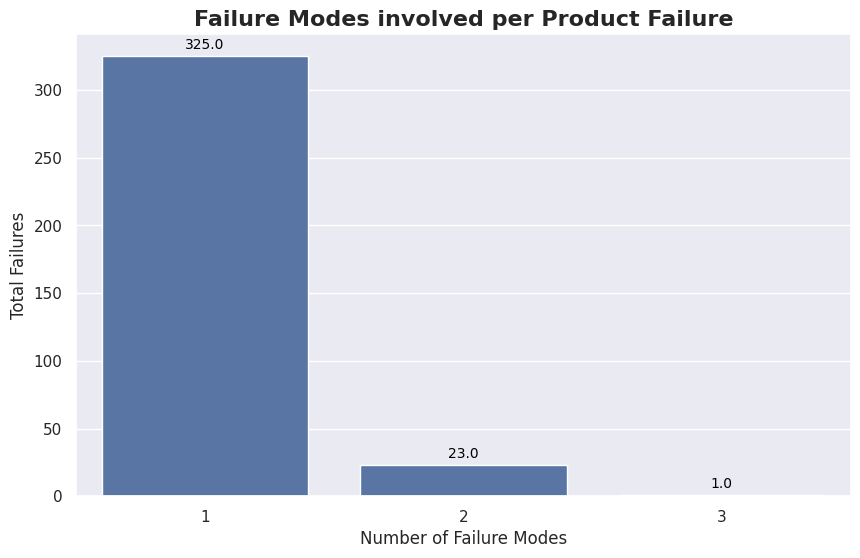

In [31]:
# Count the number of failure modes for each row
df['failure_types_count'] = df[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].sum(axis=1)
failure_types_count_df=df[df['failure_types_count'] !=0]
# Visualize the distribution of failure counts
plt.figure(figsize=(10, 6))
sns.countplot(x='failure_types_count', data=failure_types_count_df,)
plt.title('Failure Modes involved per Product Failure', fontsize=16, fontweight='bold')
plt.xlabel('Number of Failure Modes', fontsize=12)
plt.ylabel('Total Failures')

# Add annotations for the count above each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='baseline', fontsize=10, color='black',
                       xytext=(0, 5), textcoords='offset points')

plt.show()

---
The bar chart shows the number of product failures that were caused by one, two, or three different failure modes. The majority (325) of failures were caused by only one failure mode. A much smaller number of failures (23) were caused by two failure modes, and a tiny number (1) were caused by three failure modes.

---

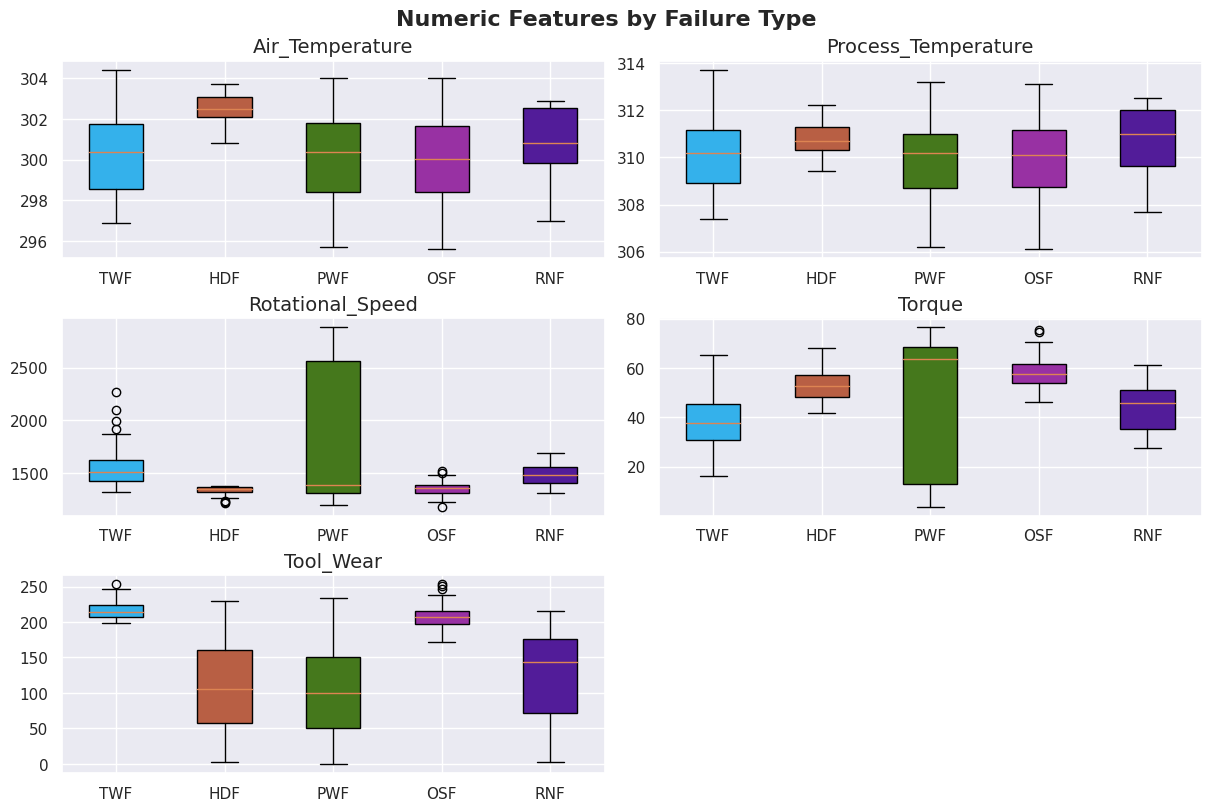

In [32]:
# Define failure types and features
failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
features = ['Air_Temperature', 'Process_Temperature', 'Rotational_Speed', 'Torque', 'Tool_Wear']

# Colors for each failure type
colors = ['#34b1eb', '#b85f44', '#45781c', '#9831a3', '#521c99']

# Create subplots for each feature
fig, axs = plt.subplots(3, 2, figsize=(12, 8), constrained_layout=True)

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Iterate through each feature to create colored boxplots
for i, feature in enumerate(features):
    # Prepare data for boxplot
    data = [df[df[failure_type] == 1][feature] for failure_type in failure_types]

    # Create boxplot for the feature with colors
    box = axs[i].boxplot(data, patch_artist=True, labels=failure_types)

    # Color the boxplots
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

    # Set title and labels
    axs[i].set_title(f'{feature}', fontsize=14)
    axs[i].set_ylabel('', fontsize=12)
    axs[i].set_xlabel('', fontsize=12)


plt.delaxes(axs[-1])
# Main title for all plots
plt.suptitle("Numeric Features by Failure Type", fontsize=16, fontweight='bold')
plt.show()

---
**Combined Analysis:**

1. **TWF (Tool Wear Failure)**:
   - **Critical Factor**: Tool Wear.
   - **Supporting Factors**: Less affected by temperature or torque, highlighting the significance of maintenance and regular tool checks to prevent such failures.

2. **HDF (Heat Dissipation Failure)**:
   - **Critical Factors**: Process Temperature and Rotational Speed.
   - **Supporting Factors**: Higher air temperatures contribute but aren't decisive alone. Effective cooling systems and monitoring of rotational speed are crucial to mitigating this risk.

3. **PWF (Power Failure)**:
   - **Critical Factors**: Rotational Speed and Torque.
   - **Supporting Factors**: Elevated process temperatures can worsen power failures, indicating a need for energy efficiency and system checks to maintain stable operations.

4. **OSF (Overstrain Failure)**:
   - **Critical Factors**: Torque and Tool Wear.
   - **Supporting Factors**: Speed plays a role, with careful monitoring required to ensure stress levels do not exceed operational limits, preventing material fatigue.

5. **RNF (Random Failures)**:
   - **Critical Factors**: None.
   - **Supporting Factors**: While random, maintaining optimal operational conditions across the board minimizes the likelihood of these unpredictable failures.

   ---


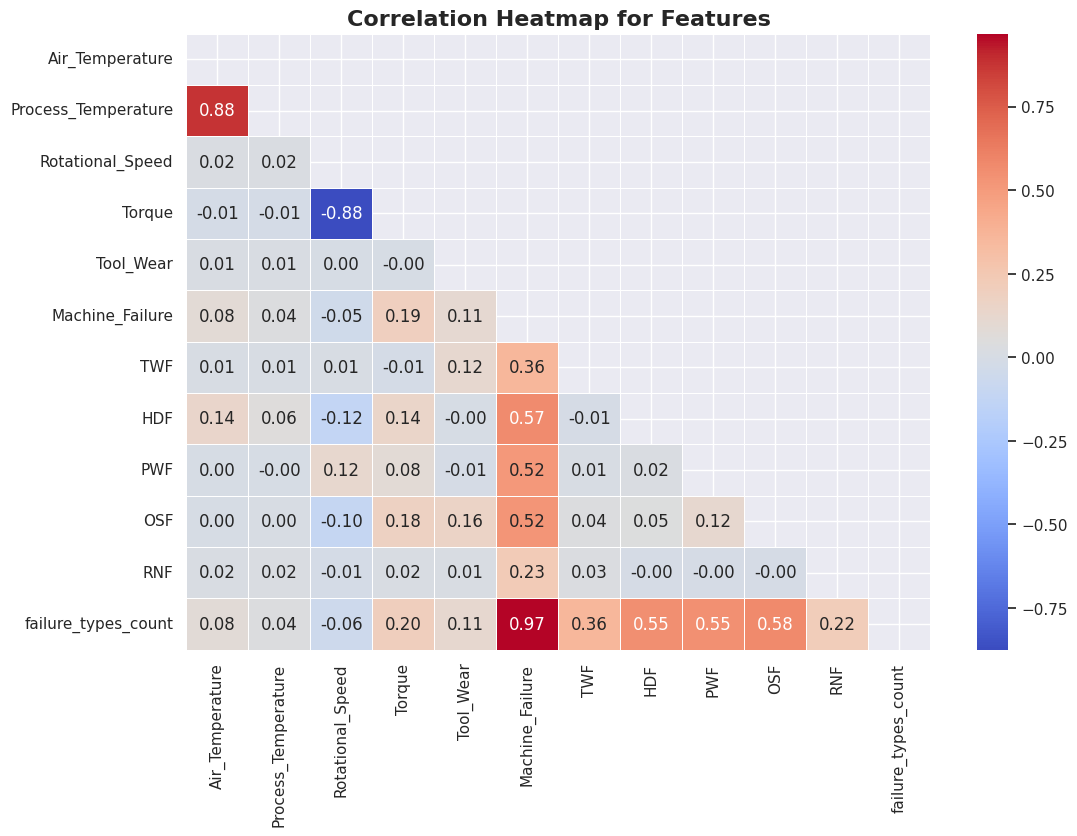

In [33]:
# Calculate the correlation matrix
corr_matrix = df.drop('UDI', axis=1).select_dtypes(include=['int64', 'float64']).corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, mask=mask, linewidths=0.5, )

# Customize the title and display the heatmap
plt.title('Correlation Heatmap for Features', fontsize=16, fontweight='bold')
plt.show()


---
Based on the heatmap, we can see that:

- There is a strong positive correlation between Process_Temperature and Air_Temperature (0.88).
- There is a strong negative correlation between Torque and Rotational_Speed (-0.88).
- There is a weak positive correlation between Machine_Failure and TWF (0.36).
- There is a moderate positive correlation between Machine_Failure and PWF (0.52).
- There is a moderate positive correlation between Machine_Failure and OSF (0.52).
-There is a moderate positive correlation between Machine_Failure and HDF (0.57).

---

##

Encoding

Data Splitting

Handling Imbalances


Feature Creation

Feature Selection

Feature Scaling



## **Encoding Categorical Feature**

For categorical variables like 'Type' in the dataset  where 'L' is for low, 'M' is for medium, and 'H' is for high quality, which are ordinal in nature (i.e., they have a meaningful order), ordinal encoding is a suitable method.

Therefore, assigning integer values to each category based on their order. For example:

- 'L' (low) → 1

- 'M' (medium) → 2

- 'H' (high) → 3


In [34]:
# Define the ordinal mapping
ordinal_mapping = {'L': 1, 'M': 2, 'H': 3}
df_MF=df.copy()
# Apply the mapping
df_MF['Quality_Type_Encoded'] = df['Type'].map(ordinal_mapping)



df_MF.head()

,UDI,Product_ID,Type,Air_Temperature,Process_Temperature,Rotational_Speed,Torque,Tool_Wear,Machine_Failure,TWF,HDF,PWF,OSF,RNF,failure_types_count,Quality_Type_Encoded
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0,2
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,0,1
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,0,1
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,0,1
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,0,1


### **Dropping features which are not helpful in predicting Machine_Failure**

In [35]:
df_MF=df_MF.drop(columns=['UDI','Product_ID', 'Type', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'failure_types_count' ], axis=1) #Dropping columns which are not helpful

df_MF.head()

,Air_Temperature,Process_Temperature,Rotational_Speed,Torque,Tool_Wear,Machine_Failure,Quality_Type_Encoded
0,298.1,308.6,1551,42.8,0,0,2
1,298.2,308.7,1408,46.3,3,0,1
2,298.1,308.5,1498,49.4,5,0,1
3,298.2,308.6,1433,39.5,7,0,1
4,298.2,308.7,1408,40.0,9,0,1


## **Splitting Dataset into Train and Test**

**Stratified Sampling**

Stratified sampling ensures that the training and testing datasets maintain the same class proportions as the original dataset. In other words, the ratio of the majority to minority class is preserved in both training and testing sets.

In [36]:
X = df_MF.drop(columns='Machine_Failure')
y = df_MF['Machine_Failure']

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,        # 20% of the data for testing, 80% for training
    random_state=42,
    stratify=y            # Stratify by the target variable
)

# Verify the distribution
print("Training set distribution:\n", y_train.value_counts(normalize=True))
print("\nTesting set distribution:\n", y_test.value_counts(normalize=True))


Training set distribution:
 Machine_Failure
0    0.965125
1    0.034875
Name: proportion, dtype: float64

Testing set distribution:
 Machine_Failure
0    0.965
1    0.035
Name: proportion, dtype: float64


In [37]:
print(f"No of rows in Training Dataset: {X_train.shape[0]}\nNo of cols in Training Dataset: {X_train.shape[1]}")

No of rows in Training Dataset: 8000
No of cols in Training Dataset: 6


In [38]:
print(f"No of rows in Test Dataset: {X_test.shape[0]}\nNo of cols in Training Dataset: {X_test.shape[1]}")

No of rows in Test Dataset: 2000
No of cols in Training Dataset: 6


## **Handling Imbalanced Dataset**

Considering dataset's severe imbalance and the need for a robust decision boundary, **SMOTEENN** might be suitable. It aggressively removes noisy samples, which can help improve the model's performance on such a highly imbalanced dataset.

**SMOTE** generates synthetic samples of the minority class by interpolating between existing minority samples.

**ENN** removes noisy and misclassified samples from both classes, which can help in refining the decision boundary between classes.

In [39]:
from imblearn.combine import SMOTEENN

# create the over-sampling and under-sampling object
smote_enn = SMOTEENN(sampling_strategy = 0.8, random_state=42)
# Fit and transform the training data
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# Check new distribution
print("Resampled training set distribution:\ny_train: ",  y_train_resampled.value_counts(normalize=True))

Resampled training set distribution:
y_train:  Machine_Failure
0    0.533554
1    0.466446
Name: proportion, dtype: float64


In [40]:
print(f"No of rows in Resampled Training Dataset: {X_train_resampled.shape[0]}\nNo of cols in Resampled Training Dataset: {X_train_resampled.shape[1]}")

No of rows in Resampled Training Dataset: 12100
No of cols in Resampled Training Dataset: 6



---
## **Note:**
**The resampling process has balanced the dataset, which has the potential to enhance the performance of machine learning models. Moving forward, we will evaluate and compare the results using both the original imbalanced dataset and the balanced dataset obtained through SMOTETomek resampling. This will help us understand the impact of balancing on model performance and make more informed decisions.**

---







## **ML without Feature Engineering**

In [41]:
X_train.shape, X_test.shape

((8000, 6), (2000, 6))

In [42]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on training data and transform both training and testing data
train = scaler.fit_transform(X_train)
test = scaler.transform(X_test)

# Initialize the LightGBM model
lightgbm_model = LGBMClassifier(n_estimators=100, random_state=42)

# Train the model
lightgbm_model.fit(train, y_train)
y_pred = lightgbm_model.predict(test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, lightgbm_model.predict_proba(test)[:, 1])

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)

[LightGBM] [Info] Number of positive: 279, number of negative: 7721
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000783 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034875 -> initscore=-3.320487
[LightGBM] [Info] Start training from score -3.320487
Accuracy: 0.984
Precision: 0.88
Recall: 0.6285714285714286
F1 Score: 0.7333333333333334
ROC AUC: 0.9800888230940044


In [43]:
X_train.shape

(8000, 6)

## **Feature Engineering**

In [44]:
# New Features Generation
def prepare_features(df):
    epsilon=1e-10
    df = df.copy()
    # Additional Columns
    df['Power'] = df['Torque'] * (df['Rotational_Speed'] * (2 * np.pi / 60))
    df['Temperature_Difference'] = df['Process_Temperature'] - df['Air_Temperature']


    numeric_columns=['Power', 'Temperature_Difference', 'Process_Temperature', 'Air_Temperature', 'Torque', 'Tool_Wear', 'Rotational_Speed']

    # Create all combinations of columns for products
    for (col1, col2) in itertools.combinations(numeric_columns, 2):
        new_col_name = f'{col1}_{col2}_Product'
        df[new_col_name] = df[col1] * df[col2]

     # Create all combinations of columns for ratios
    for (col1, col2) in itertools.combinations(numeric_columns, 2):

        new_col_name = f'{col1}_{col2}_Ratio'
        # Calculate the ratio and add epsilon to the denominator to avoid division by zero
        df[new_col_name] = df[col1] / (df[col2] + epsilon)

    # Power columns
    for col in numeric_columns:
        df[f'{col}_Square'] = df[col] ** 2
        df[f'{col}_Cube'] = df[col] ** 3
        df[f'{col}_Log'] = df[col].apply(lambda x: math.log(x) if x > 0 else 0)


    return df


In [45]:
def prepare_datasets(X_train, X_train_resampled, X_test):
    # Apply feature creation to training and testing datasets
    X_train = prepare_features(X_train)
    X_train_resampled = prepare_features(X_train_resampled)
    X_test = prepare_features(X_test)

    return X_train, X_train_resampled, X_test

# Example usage
# Assuming X_train, X_train_resampled, and X_test are your existing DataFrames
X_train_prepared, X_train_resampled_prepared, X_test_prepared = prepare_datasets(X_train, X_train_resampled, X_test)

In [46]:
X_train_prepared

,Air_Temperature,Process_Temperature,Rotational_Speed,Torque,Tool_Wear,Quality_Type_Encoded,Power,Temperature_Difference,Power_Temperature_Difference_Product,Power_Process_Temperature_Product,...,Air_Temperature_Log,Torque_Square,Torque_Cube,Torque_Log,Tool_Wear_Square,Tool_Wear_Cube,Tool_Wear_Log,Rotational_Speed_Square,Rotational_Speed_Cube,Rotational_Speed_Log
2996,300.5,309.8,1508,37.8,150,2,5969.277369,9.3,55514.279534,1.849282e+06,...,5.705448,1428.84,54010.152,3.632309,22500,3375000,5.010635,2274064,3429288512,7.318540
6525,301.1,310.4,1312,73.6,49,1,10112.074658,9.3,94042.294315,3.138788e+06,...,5.707442,5416.96,398688.256,4.298645,2401,117649,3.891820,1721344,2258403328,7.179308
4757,303.4,311.6,1497,42.8,58,1,6709.562262,8.2,55018.410549,2.090700e+06,...,5.715052,1831.84,78402.752,3.756538,3364,195112,4.060443,2241009,3354790473,7.311218
770,296.8,308.0,1391,54.4,17,1,7924.185758,11.2,88750.880487,2.440649e+06,...,5.693059,2959.36,160989.184,3.996364,289,4913,2.833213,1934881,2691419471,7.237778
177,298.2,308.2,1988,21.4,41,1,4455.113486,10.0,44551.134860,1.373066e+06,...,5.697764,457.96,9800.344,3.063391,1681,68921,3.713572,3952144,7856862272,7.594884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3310,301.3,310.4,1346,46.7,90,1,6582.495311,9.1,59900.707332,2.043207e+06,...,5.708106,2180.89,101847.563,3.843744,8100,729000,4.499810,1811716,2438569736,7.204893
4537,302.3,310.2,1548,35.3,170,1,5722.348187,7.9,45206.550675,1.775072e+06,...,5.711420,1246.09,43986.977,3.563883,28900,4913000,5.135798,2396304,3709478592,7.344719
2230,299.5,308.7,1446,45.7,173,1,6920.111802,9.2,63665.028576,2.136239e+06,...,5.702114,2088.49,95443.993,3.822098,29929,5177717,5.153292,2090916,3023464536,7.276556
2102,299.3,309.3,1325,62.0,47,1,8602.727883,10.0,86027.278831,2.660824e+06,...,5.701446,3844.00,238328.000,4.127134,2209,103823,3.850148,1755625,2326203125,7.189168



---
Now we have 71 features in total for traning and 1 target variable.

---

## **Feature Scaling**

In [47]:
def scale_all_columns(df, scaler):
    df_scaled = df.copy()
    df_scaled[:] = scaler.transform(df)
    return df_scaled

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on all columns of X_train_prepared
scaler.fit(X_train_prepared)

# Transform the datasets
X_train_scaled = scale_all_columns(X_train_prepared, scaler)
X_train_resampled_scaled = scale_all_columns(X_train_resampled_prepared, scaler)
X_test_scaled = scale_all_columns(X_test_prepared, scaler)

In [48]:
X_train_scaled

,Air_Temperature,Process_Temperature,Rotational_Speed,Torque,Tool_Wear,Quality_Type_Encoded,Power,Temperature_Difference,Power_Temperature_Difference_Product,Power_Process_Temperature_Product,...,Air_Temperature_Log,Torque_Square,Torque_Cube,Torque_Log,Tool_Wear_Square,Tool_Wear_Cube,Tool_Wear_Log,Rotational_Speed_Square,Rotational_Speed_Cube,Rotational_Speed_Log
2996,0.248034,-0.140244,-0.169077,-0.220688,0.663410,0.756130,-0.291106,-0.702175,-0.587335,-0.294705,...,0.251246,-0.334239,-0.408322,-0.078257,0.476747,0.268181,0.634199,-0.200357,-0.219574,-0.128736
6525,0.548620,0.265697,-1.256311,3.364738,-0.924618,-0.743385,3.587288,-0.702175,2.506950,3.597746,...,0.551148,4.581972,5.997713,2.331336,-0.925650,-0.816602,-0.445272,-1.083770,-0.906782,-1.419219
4757,1.700867,1.077580,-0.230095,0.280070,-0.783110,-0.743385,0.401932,-1.801842,-0.627160,0.434028,...,1.695260,0.162545,0.045028,0.370978,-0.858457,-0.790805,-0.282579,-0.253189,-0.263298,-0.196593
770,-1.605581,-1.358068,-0.818089,1.441828,-1.427755,-0.743385,1.539036,1.197250,2.081983,1.490372,...,-1.611483,1.552455,1.579943,1.238233,-1.073013,-0.854146,-1.466653,-0.742474,-0.652639,-0.877281
177,-0.904213,-1.222754,2.493535,-1.863173,-1.050402,-0.743385,-1.708632,-0.002387,-1.467814,-1.732191,...,-0.903950,-1.531056,-1.229986,-2.135570,-0.975887,-0.832830,-0.617252,2.481721,2.379028,2.432596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3310,0.648815,0.265697,-1.067709,0.670661,-0.279972,-0.743385,0.282975,-0.902114,-0.235050,0.290668,...,0.650982,0.592824,0.480763,0.686331,-0.528005,-0.613007,0.141337,-0.939329,-0.801040,-1.182086
4537,1.149792,0.130383,0.052807,-0.471067,0.977871,-0.743385,-0.522275,-2.101751,-1.415176,-0.518711,...,1.149162,-0.559517,-0.594608,-0.325699,0.923303,0.780375,0.754960,-0.004981,-0.055127,0.113912
2230,-0.252943,-0.884470,-0.512998,0.570510,1.025041,-0.743385,0.599044,-0.802145,0.067273,0.571490,...,-0.249923,0.478921,0.361749,0.608056,0.995101,0.868532,0.771838,-0.493083,-0.457758,-0.517861
2102,-0.353139,-0.478529,-1.184198,2.202980,-0.956064,-0.743385,2.174272,-0.002387,1.863243,2.154982,...,-0.350357,2.642963,3.017328,1.711122,-0.939046,-0.821207,-0.485480,-1.028979,-0.866990,-1.327833


## **Feature Selection**

In [49]:
print(f"Total Features: {len(X_train_scaled.columns)}")

Total Features: 71


---
Recursive Feature Elimination (RFE) is a feature selection method that helps identify the most important features by recursively removing the least important ones and building the model multiple times.

---

In [50]:
# Initialize the RandomForestClassifier
model = LGBMClassifier(random_state=42,  verbose=-1)

# Initialize RFE with the model and the number of features to select
num_features_to_select = 25 # Adjust as needed
rfe = RFE(estimator=model, n_features_to_select=num_features_to_select)

# Fit RFE to the data
rfe.fit(X_train_scaled, y_train)

# Get the selected features
selected_features = X_train_scaled.columns[rfe.support_]

print("Selected features:", selected_features)


Selected features: Index(['Process_Temperature', 'Rotational_Speed', 'Tool_Wear',
       'Quality_Type_Encoded', 'Temperature_Difference',
       'Power_Temperature_Difference_Product',
       'Power_Process_Temperature_Product', 'Power_Tool_Wear_Product',
       'Power_Rotational_Speed_Product',
       'Temperature_Difference_Process_Temperature_Product',
       'Temperature_Difference_Torque_Product',
       'Temperature_Difference_Tool_Wear_Product',
       'Temperature_Difference_Rotational_Speed_Product',
       'Process_Temperature_Air_Temperature_Product',
       'Air_Temperature_Rotational_Speed_Product', 'Torque_Tool_Wear_Product',
       'Power_Temperature_Difference_Ratio', 'Power_Process_Temperature_Ratio',
       'Power_Tool_Wear_Ratio',
       'Temperature_Difference_Process_Temperature_Ratio',
       'Temperature_Difference_Torque_Ratio',
       'Temperature_Difference_Tool_Wear_Ratio',
       'Temperature_Difference_Rotational_Speed_Ratio',
       'Process_Temperature_T

In [51]:
# Creating datasets with reduced (30 features) features using original dataset
X_train_reduced=X_train_scaled[selected_features]
X_test_reduced=X_test_scaled[selected_features]

# Creating dataset with reduced features for resampled training set
X_train_resampled_reduced=X_train_resampled_scaled[selected_features]

In [52]:
X_train_scaled.shape, X_test_scaled.shape

((8000, 71), (2000, 71))

In [53]:
X_train_reduced.shape, X_test_reduced.shape

((8000, 25), (2000, 25))

In [54]:
X_train_resampled_reduced.shape, X_test_reduced.shape

((12100, 25), (2000, 25))

## **Machine Learning: Predicting 'Machine_Failure'**

---
The below function evaluates multiple machine learning models for binary classification. It trains and tests six models: Logistic Regression, Random Forest, XGBoost, LightGBM, BalancedRandomForest and CatBoost. For each model, it calculates and stores accuracy, precision, recall, and F1 score. Finally, the function compiles the results into a DataFrame for comparison, helping to identify the best-performing model based on these metrics.

---

In [74]:
# Define function to train and evaluate models
def evaluate_models(X_train, y_train, X_test, y_test):

    # List of models to evaluate
    models = [
        ("Logistic Regression", LogisticRegression(random_state=42, penalty='l2',  max_iter=500)),
        ("Random Forest", RandomForestClassifier(random_state=42, n_estimators=200)),
        ("XGBoost", XGBClassifier( eval_metric='logloss', random_state=42)),
        ("LightGBM", LGBMClassifier(random_state=42,  verbose=-1)),
        ("CatBoost", CatBoostClassifier(verbose=0, random_state=42)),
        ("BalancedRandomForest", BalancedRandomForestClassifier(n_estimators=200, random_state=42, sampling_strategy='auto', replacement=False, bootstrap=True)),
        ("SVM", SVC(kernel='linear', C=1.0, random_state=42))
        ]

    # Dictionary to store results
    results = {
        "Model": [],
        "Accuracy": [],
        "Precision": [],
        "Recall": [],
        "F1": [],
        "ROC_AUC":[]
    }


    # Evaluate each model
    for name, model in models:
        # Train the model
        model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)

        # Store the results
        results["Model"].append(name)
        results["Accuracy"].append(accuracy)
        results["Precision"].append(precision)
        results["Recall"].append(recall)
        results["F1"].append(f1)
        results["ROC_AUC"].append(roc_auc)

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)


    return results_df





---
Applying `'evaluate_models'` function dataset with 71 features (X_train_scaled, y_train), (X_test_scaled, y_test)

- Train Rows: 8000
- Test Rows: 2000
- Features: 71
- Target Column: 'Machine_Failure'

---

In [75]:
# Call the function and display the results
results_df = evaluate_models(X_train_scaled, y_train, X_test_scaled, y_test)
print(results_df)

                  Model  Accuracy  Precision    Recall        F1   ROC_AUC
0   Logistic Regression    0.9745   0.827586  0.342857  0.484848  0.670133
1         Random Forest    0.9900   0.890625  0.814286  0.850746  0.905329
2               XGBoost    0.9915   0.949153  0.800000  0.868217  0.899223
3              LightGBM    0.9930   0.966667  0.828571  0.892308  0.913768
4              CatBoost    0.9920   0.935484  0.828571  0.878788  0.913249
5  BalancedRandomForest    0.9180   0.297414  0.985714  0.456954  0.950629
6                   SVM    0.9700   0.857143  0.171429  0.285714  0.585196



---
Applying `'evaluate_models'` function to dataset with reduced features (X_train_reduced, y_train), (X_test_reduced, y_test)

- Train Rows: 8000
- Test Rows: 2000
- Features: 25
- Target Column: 'Machine_Failure'

---

In [76]:
results_df = evaluate_models(X_train_reduced, y_train, X_test_reduced, y_test)
print(results_df)


                  Model  Accuracy  Precision    Recall        F1   ROC_AUC
0   Logistic Regression    0.9705   0.761905  0.228571  0.351648  0.612990
1         Random Forest    0.9905   0.892308  0.828571  0.859259  0.912472
2               XGBoost    0.9905   0.918033  0.800000  0.854962  0.898705
3              LightGBM    0.9940   1.000000  0.828571  0.906250  0.914286
4              CatBoost    0.9915   0.934426  0.814286  0.870229  0.906107
5  BalancedRandomForest    0.9125   0.282158  0.971429  0.437299  0.940896
6                   SVM    0.9655   1.000000  0.014286  0.028169  0.507143



---
Applying `'evaluate_models'` function to resampled-scaled dataset (X_train_resampled_scaled, y_train_resampled), (X_test_scaled, y_test)

- Train Rows: 12100
- Test Rows: 2000
- Features: 71
- Target Column: 'Machine_Failure'

---

In [77]:
results_df = evaluate_models(X_train_resampled_scaled, y_train_resampled, X_test_scaled, y_test)
print(results_df)

                  Model  Accuracy  Precision    Recall        F1   ROC_AUC
0   Logistic Regression    0.8990   0.251880  0.957143  0.398810  0.927017
1         Random Forest    0.9505   0.407643  0.914286  0.563877  0.933050
2               XGBoost    0.9555   0.436242  0.928571  0.593607  0.942524
3              LightGBM    0.9585   0.453901  0.914286  0.606635  0.937195
4              CatBoost    0.9540   0.427632  0.928571  0.585586  0.941747
5  BalancedRandomForest    0.9465   0.387879  0.914286  0.544681  0.930977
6                   SVM    0.9025   0.260536  0.971429  0.410876  0.935714



---
Applying `'evaluate_models'` function to resampled-scaled dataset (X_train_resampled_reduced, y_train_resampled), (X_test_reduced, y_test)

- Train Rows: 12100
- Test Rows: 2000
- Features: 25
- Target Column: 'Machine_Failure'

---

In [78]:
results_df = evaluate_models(X_train_resampled_reduced, y_train_resampled, X_test_reduced, y_test)
print(results_df)

                  Model  Accuracy  Precision    Recall        F1   ROC_AUC
0   Logistic Regression    0.8820   0.217687  0.914286  0.351648  0.897557
1         Random Forest    0.9510   0.412500  0.942857  0.573913  0.947076
2               XGBoost    0.9570   0.445205  0.928571  0.601852  0.943301
3              LightGBM    0.9610   0.471014  0.928571  0.625000  0.945374
4              CatBoost    0.9520   0.416667  0.928571  0.575221  0.940711
5  BalancedRandomForest    0.9455   0.385965  0.942857  0.547718  0.944226
6                   SVM    0.8875   0.228070  0.928571  0.366197  0.907291


## **Insights**

---

**Key Metrics:**

| **Metric**   | **When to Use in Synthetic Milling**                                                                                   |
|--------------|-----------------------------------------------------------------------------------------------------------------------|
| **Recall**   | Prioritize when missing failures is critical, such as preventing catastrophic machine breakdowns and ensuring safety.  |
| **Precision**| Focus on reducing false alarms when unnecessary maintenance or interventions are costly.                               |
| **F1 Score** | Balance recall and precision when both false positives and false negatives have significant costs.                     |
| **Accuracy** | Less relevant due to imbalanced data; not recommended for critical failure prediction.                                 |
| **ROC-AUC**  | Useful for comparing models and adjusting thresholds based on specific operational needs.                              |

**Our Aim:**

- **Prioritize Recall:** If missing failures is the primary concern due to potential damage or high costs, focus on models with high recall.
- **Balance with Precision:** If false positives lead to costly interruptions, seek a balance with precision, perhaps through the F1 score.
- **Utilize ROC-AUC:** Use ROC-AUC to understand model behavior across thresholds, helping fine-tune the balance between recall and precision.

---

**Observations:**

To achieve the highest overall performance in predicting machine failures, we have identified key models and dataset characteristics:

**Dataset:** The reduced features dataset, consisting of 25 features, provides a balanced approach to the performance metrics.
- **Train Rows:** 8000
- **Test Rows:** 2000
- **Features:** 25
- **Target Column:** 'Machine_Failure'

**Model Insights:**
- **LightGBM:** Delivers outstanding performance across all scenarios.
- **Balanced Random Forest:** Excels in recall, making it ideal for scenarios where missing a failure is costly.
- **CatBoost:** Offers a strong F1 score, indicating a good balance between precision and recall.

| Model                 | Precision | Recall  | F1 Score |
|-----------------------|-----------|---------|----------|
| **LightGBM**          | 1.000000  | 0.828571| 0.906250 |
| **CatBoost**          | 0.934426  | 0.814286| 0.870229 |
| **Balanced Random Forest** | 0.282158  | 0.971429| 0.437299 |

**Future Steps:**

Our future modeling efforts will focus on the reduced dataset with 25 features and 8000 training rows. We plan to leverage the strengths of LightGBM, CatBoost, and Balanced Random Forest through ensemble techniques and hyperparameter tuning to achieve even better results.

---


## **Hyperparameter Tuning: LGBMClassifier, CatBoostClassifier, BalancedRandomForest Classifier**

**Dataset:** X_train_reduced, y_train, X_test_reduced, y_test

**Features:** 25

### **1. LGBM Hyperparameter Tuning Using Optuna**

In [123]:
# Objective function for Optuna
def objective(trial):
    param = {
        'objective': 'binary',
        'metric': 'f1_score',
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 10, 1000),
        'learning_rate': trial.suggest_float('learning_rate', .01,.1, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 50),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
       'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])
    }

    model = LGBMClassifier(**param, random_state=42, verbose=-1)
    model.fit(X_train_reduced, y_train)
    y_pred = model.predict(X_test_reduced)

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)

    # Optuna minimizes the objective function, so we return the negative F1 score
    return f1



In [124]:
# Create and run the Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# Print the best parameters and score
print("Best parameters:", study.best_params)
print("Best F1 score:", study.best_value)


[I 2024-08-09 11:53:42,815] A new study created in memory with name: no-name-bb236fb4-721d-468b-864b-e985bdf6d366
[I 2024-08-09 11:53:44,997] Trial 0 finished with value: 0.8923076923076922 and parameters: {'num_leaves': 539, 'learning_rate': 0.09899520655463694, 'n_estimators': 230, 'max_depth': 13, 'min_child_samples': 19, 'subsample': 0.7529526045092599, 'colsample_bytree': 0.8337281855599529, 'class_weight': None}. Best is trial 0 with value: 0.8923076923076922.
[I 2024-08-09 11:53:45,743] Trial 1 finished with value: 0.8467153284671534 and parameters: {'num_leaves': 654, 'learning_rate': 0.07261311385733964, 'n_estimators': 436, 'max_depth': 4, 'min_child_samples': 34, 'subsample': 0.699318762128893, 'colsample_bytree': 0.8840489507535587, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.8923076923076922.
[I 2024-08-09 11:53:51,454] Trial 2 finished with value: 0.8837209302325583 and parameters: {'num_leaves': 234, 'learning_rate': 0.016795254579435332, 'n_estimators': 5

Best parameters: {'num_leaves': 869, 'learning_rate': 0.07972437883304194, 'n_estimators': 772, 'max_depth': 5, 'min_child_samples': 31, 'subsample': 0.6741352457173754, 'colsample_bytree': 0.6718832515992744, 'class_weight': None}
Best F1 score: 0.90625


In [127]:
# Train and evaluate the final model with the best parameters
best_params_lgbm = study.best_params # Save best params
best_model = LGBMClassifier(**best_params_lgbm, random_state=42, verbose=-1)
best_model.fit(X_train_reduced, y_train)
y_pred = best_model.predict(X_test_reduced)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test_reduced)[:, 1])

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.994
Precision: 1.0
Recall: 0.8285714285714286
F1 Score: 0.90625
ROC AUC: 0.9784159881569208
Confusion Matrix:
[[1930    0]
 [  12   58]]


### **2. BRF Hyperparameter Tuning Using Optuna**

In [129]:
# Objective function for Optuna
def objective(trial):
    param = {
        'bootstrap': trial.suggest_categorical('bootstrap', [False, True]),
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 50),
        'max_features': trial.suggest_int('max_features', 2, 10),
        'min_samples_leaf':trial.suggest_int('min_samples_leaf', 1, 10),
        'replacement': trial.suggest_categorical('replacement',[True, False]),
        'sampling_strategy': trial.suggest_categorical('sampling_strategy', ['auto', 'majority', 'not minority', 'not majority', 'all'])
    }

    model = BalancedRandomForestClassifier(**param, random_state=42,)
    model.fit(X_train_reduced, y_train)
    y_pred = model.predict(X_test_reduced)

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)

    # Optuna minimizes the objective function, so we return the negative F1 score
    return f1



In [130]:
# Create and run the Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# Print the best parameters and score
print("Best parameters:", study.best_params)
print("Best F1 score:", study.best_value)


[I 2024-08-09 11:57:08,604] A new study created in memory with name: no-name-35d74f4b-2adc-481a-8ad1-fa995fdafb06
[I 2024-08-09 11:57:11,032] Trial 0 finished with value: 0.4718309859154929 and parameters: {'bootstrap': False, 'n_estimators': 417, 'max_depth': 7, 'min_samples_split': 15, 'max_features': 3, 'min_samples_leaf': 3, 'replacement': True, 'sampling_strategy': 'auto'}. Best is trial 0 with value: 0.4718309859154929.
[I 2024-08-09 11:57:17,006] Trial 1 finished with value: 0.4380952380952381 and parameters: {'bootstrap': False, 'n_estimators': 549, 'max_depth': 12, 'min_samples_split': 24, 'max_features': 7, 'min_samples_leaf': 3, 'replacement': False, 'sampling_strategy': 'all'}. Best is trial 0 with value: 0.4718309859154929.
[I 2024-08-09 11:57:17,365] Trial 2 finished with value: 0.4035608308605341 and parameters: {'bootstrap': True, 'n_estimators': 49, 'max_depth': 12, 'min_samples_split': 25, 'max_features': 8, 'min_samples_leaf': 3, 'replacement': True, 'sampling_strate

Best parameters: {'bootstrap': True, 'n_estimators': 815, 'max_depth': 15, 'min_samples_split': 14, 'max_features': 10, 'min_samples_leaf': 1, 'replacement': True, 'sampling_strategy': 'not majority'}
Best F1 score: 0.8976377952755905


In [144]:
# Train and evaluate the final model with the best parameters
best_params_brf= study.best_params # Save best params
best_model = BalancedRandomForestClassifier(**best_params_brf, random_state=42, )
best_model.fit(X_train_reduced, y_train)
y_pred = best_model.predict(X_test_reduced)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test_reduced)[:, 1])

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9935
Precision: 1.0
Recall: 0.8142857142857143
F1 Score: 0.8976377952755905
ROC AUC: 0.9872686898593636
Confusion Matrix:
[[1930    0]
 [  13   57]]


### **3. CatBoost Hyperparameter Tuning Using Optuna**

In [134]:
# Objective function for Optuna
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000 ),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'depth': trial.suggest_int('depth', 3, 12),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'border_count':trial.suggest_int('border_count', 32, 256),
        'thread_count': trial.suggest_int('thread_count',2, 8),
        'bagging_temperature': trial.suggest_int('bagging_temperature', 0, 1),
        'subsample': trial.suggest_float('subsample', 0.6, 1),
        'loss_function':'Logloss',
        'early_stopping_rounds': trial.suggest_int('early_stopping_rounds', 10, 100),


    }

    model = CatBoostClassifier(**param, random_state=42,verbose=0)
    model.fit(X_train_reduced, y_train)
    y_pred = model.predict(X_test_reduced)

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)


    return f1

In [135]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# Print the best parameters and score
print("Best parameters:", study.best_params)
print("Best F1 score:", study.best_value)


[I 2024-08-09 12:19:55,200] A new study created in memory with name: no-name-3e2d1ea9-8398-4020-b4d0-3cc216e107c8
[I 2024-08-09 12:19:56,955] Trial 0 finished with value: 0.8217054263565892 and parameters: {'n_estimators': 464, 'learning_rate': 0.059121027265028735, 'depth': 4, 'l2_leaf_reg': 4.387261245363881, 'border_count': 103, 'thread_count': 3, 'bagging_temperature': 0, 'subsample': 0.8575364064512577, 'early_stopping_rounds': 64}. Best is trial 0 with value: 0.8217054263565892.
[I 2024-08-09 12:21:25,876] Trial 1 finished with value: 0.8787878787878788 and parameters: {'n_estimators': 374, 'learning_rate': 0.04952858917680853, 'depth': 12, 'l2_leaf_reg': 3.4064607577280483, 'border_count': 210, 'thread_count': 8, 'bagging_temperature': 1, 'subsample': 0.6775291215251246, 'early_stopping_rounds': 30}. Best is trial 1 with value: 0.8787878787878788.
[I 2024-08-09 12:21:28,047] Trial 2 finished with value: 0.8656716417910447 and parameters: {'n_estimators': 488, 'learning_rate': 0.

Best parameters: {'n_estimators': 374, 'learning_rate': 0.04952858917680853, 'depth': 12, 'l2_leaf_reg': 3.4064607577280483, 'border_count': 210, 'thread_count': 8, 'bagging_temperature': 1, 'subsample': 0.6775291215251246, 'early_stopping_rounds': 30}
Best F1 score: 0.8787878787878788


In [147]:
# Train and evaluate the final model with the best parameters
best_params_cat= study.best_params #Save best params
best_model = CatBoostClassifier(**best_params_cat, random_state=42, verbose=0)
best_model.fit(X_train_reduced, y_train)
y_pred = best_model.predict(X_test_reduced)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test_reduced)[:, 1])

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.992
Precision: 0.9354838709677419
Recall: 0.8285714285714286
F1 Score: 0.8787878787878788
ROC AUC: 0.9883123612139156
Confusion Matrix:
[[1926    4]
 [  12   58]]


In [148]:
best_params_cat

{'n_estimators': 374,
 'learning_rate': 0.04952858917680853,
 'depth': 12,
 'l2_leaf_reg': 3.4064607577280483,
 'border_count': 210,
 'thread_count': 8,
 'bagging_temperature': 1,
 'subsample': 0.6775291215251246,
 'early_stopping_rounds': 30}

In [128]:
best_params_lgbm

{'num_leaves': 869,
 'learning_rate': 0.07972437883304194,
 'n_estimators': 772,
 'max_depth': 5,
 'min_child_samples': 31,
 'subsample': 0.6741352457173754,
 'colsample_bytree': 0.6718832515992744,
 'class_weight': None}

In [145]:
best_params_brf

{'bootstrap': True,
 'n_estimators': 815,
 'max_depth': 15,
 'min_samples_split': 14,
 'max_features': 10,
 'min_samples_leaf': 1,
 'replacement': True,
 'sampling_strategy': 'not majority'}

## **Creating Ensemble**

**1. Using Voting Classifier**



In [149]:
from sklearn.ensemble import VotingClassifier

#  Using hyper parameter tuning
model_lgbm = LGBMClassifier(**best_params_lgbm, random_state=42, verbose=-1)
model_cat = CatBoostClassifier(**best_params_cat, verbose=0, random_state=42)
model_brf = BalancedRandomForestClassifier(**best_params_brf, random_state=42)
#model_rf = RandomForestClassifier(random_state=42, n_estimators=500)
#model_xgb = XGBClassifier(random_state=42, eval_metric='logloss')

# Create the Voting Classifier
ensemble_model = VotingClassifier(estimators=[
    ('lgbm', model_lgbm),
    ('cat',model_cat),
    ('brf', model_brf),
    #('rf', model_rf),
    #('xgb', model_xgb),

], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train_reduced, y_train)

# Predict on the test set
y_pred_ensemble = ensemble_model.predict(X_test_reduced)

# Evaluate the ensemble model
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
precision_ensemble = precision_score(y_test, y_pred_ensemble)
recall_ensemble = recall_score(y_test, y_pred_ensemble)
f1_ensemble = f1_score(y_test, y_pred_ensemble)
roc_auc_ensemble = roc_auc_score(y_test, y_pred_ensemble)

print(f"VotingClassifier  - Accuracy: {accuracy_ensemble:.4f}")
print(f"VotingClassifier  - Precision: {precision_ensemble:.4f}")
print(f"VotingClassifier  - Recall: {recall_ensemble:.4f}")
print(f"VotingClassifier  - F1 Score: {f1_ensemble:.4f}")
print(f"VotingClassifier  - ROC_AUC Score: {roc_auc_ensemble:.4f}")
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_ensemble)
print("Confusion Matrix:")
print(conf_matrix)

VotingClassifier  - Accuracy: 0.9940
VotingClassifier  - Precision: 1.0000
VotingClassifier  - Recall: 0.8286
VotingClassifier  - F1 Score: 0.9062
VotingClassifier  - ROC_AUC Score: 0.9143
Confusion Matrix:
[[1930    0]
 [  12   58]]


**2. Using Stacking**

In [150]:
from sklearn.ensemble import StackingClassifier

# Define the base models
base_models = [
    ('lgbm', LGBMClassifier(**best_params_lgbm, random_state=42, verbose=-1)),
    #('rf', RandomForestClassifier(random_state=42, n_estimators=1000)),
    #('xgb', XGBClassifier(random_state=42, eval_metric='logloss')),
    ('cat', CatBoostClassifier(**best_params_cat, verbose=0, random_state=42)),
    ('brf', BalancedRandomForestClassifier(**best_params_brf, random_state=42))
]

# Define the meta-model
meta_model = LogisticRegression(random_state=42, max_iter=1000)


# Create the Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train the stacking model
stacking_model.fit(X_train_reduced, y_train)

# Predict on the test set
y_pred_stacking = stacking_model.predict(X_test_reduced)

# Evaluate the stacking model
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
precision_stacking = precision_score(y_test, y_pred_stacking)
recall_stacking = recall_score(y_test, y_pred_stacking)
f1_stacking = f1_score(y_test, y_pred_stacking)
roc_auc_stacking = roc_auc_score(y_test, y_pred_stacking)

print(f"Stacking Model - Accuracy: {accuracy_stacking:.4f}")
print(f"Stacking Model - Precision: {precision_stacking:.4f}")
print(f"Stacking Model - Recall: {recall_stacking:.4f}")
print(f"Stacking Model - F1 Score: {f1_stacking:.4f}")
print(f"Stacking Model - ROC_AUC Score: {roc_auc_stacking:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred_stacking)
print("Confusion Matrix:")
print(conf_matrix)

Stacking Model - Accuracy: 0.9940
Stacking Model - Precision: 1.0000
Stacking Model - Recall: 0.8286
Stacking Model - F1 Score: 0.9062
Stacking Model - ROC_AUC Score: 0.9143
Confusion Matrix:
[[1930    0]
 [  12   58]]


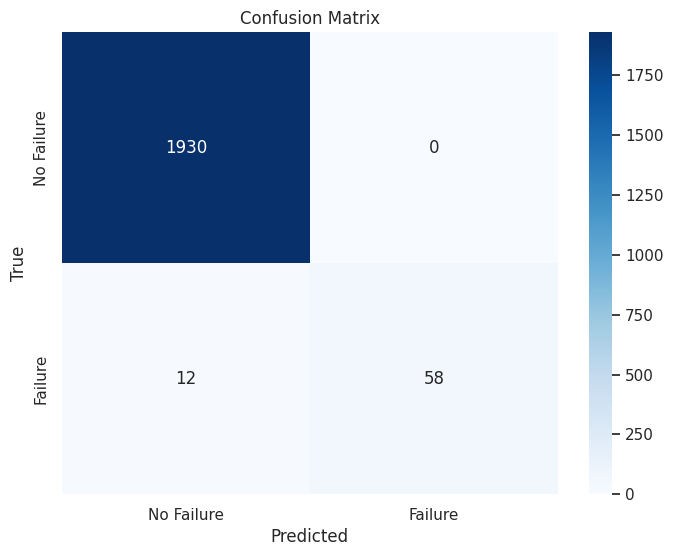

In [156]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Failure', 'Failure'],
            yticklabels=['No Failure', 'Failure'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

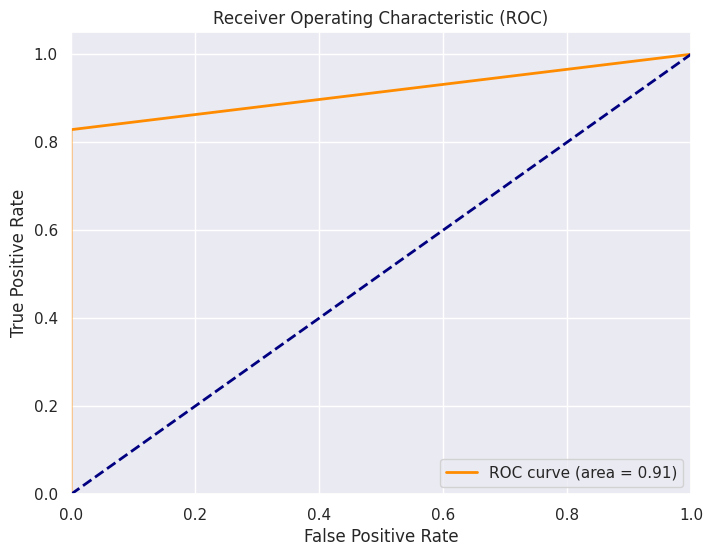

In [157]:
# Compute ROC curve and ROC AUC
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred_stacking)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## **Future Predictions**
**Final Model: Stacking**

In [182]:
import pickle
import numpy as np
import pandas as pd

# Save best Model

model_path = '/content/drive/MyDrive/Predictive Maintenance/stacking_model.pkl'
# with open(model_path, 'wb') as f:
#     pickle.dump(stacking_model, f)

model_path_2 = '/content/drive/MyDrive/Predictive Maintenance/scaler.pkl'
# Save the scaler to a file
# with open(model_path, 'wb') as file:
#    pickle.dump(scaler, file)

In [183]:
with open(model_path, 'rb') as f:
    stacking_model = pickle.load(f)

with open(model_path_2, 'rb') as f:
    scaler = pickle.load(f)

In [187]:
def custom_ordinal_encode(type_value):
    encoding = {'L': 1, 'M': 2, 'H': 3}
    return encoding.get(type_value, 0)

def preprocess_input(air_temp, process_temp, rotational_speed, torque, tool_wear, type_value):

    # Create a DataFrame from input values
    input_data = pd.DataFrame({
        'Air_Temperature': [air_temp],
        'Process_Temperature': [process_temp],
        'Rotational_Speed': [rotational_speed],
        'Torque': [torque],
        'Tool_Wear': [tool_wear],
        'Quality_Type_Encoded': [custom_ordinal_encode(type_value)]
    })

    # Calculate derived features
    input_data['Power'] = input_data['Torque'] * (input_data['Rotational_Speed'] * (2 * np.pi / 60))
    input_data['Temperature_Difference'] = input_data['Process_Temperature'] - input_data['Air_Temperature']
    input_data['Power_Temperature_Difference_Product'] = input_data['Power'] * input_data['Temperature_Difference']
    input_data['Power_Process_Temperature_Product'] = input_data['Power'] * input_data['Process_Temperature']
    input_data['Power_Tool_Wear_Product'] = input_data['Power'] * input_data['Tool_Wear']
    input_data['Power_Rotational_Speed_Product'] = input_data['Power'] * input_data['Rotational_Speed']
    input_data['Temperature_Difference_Process_Temperature_Product'] = input_data['Temperature_Difference'] * input_data['Process_Temperature']
    input_data['Temperature_Difference_Torque_Product'] = input_data['Temperature_Difference'] * input_data['Torque']
    input_data['Temperature_Difference_Tool_Wear_Product'] = input_data['Temperature_Difference'] * input_data['Tool_Wear']
    input_data['Temperature_Difference_Rotational_Speed_Product'] = input_data['Temperature_Difference'] * input_data['Rotational_Speed']
    input_data['Process_Temperature_Air_Temperature_Product'] = input_data['Process_Temperature'] * input_data['Air_Temperature']
    input_data['Air_Temperature_Rotational_Speed_Product'] = input_data['Air_Temperature'] * input_data['Rotational_Speed']
    input_data['Torque_Tool_Wear_Product'] = input_data['Torque'] * input_data['Tool_Wear']
    input_data['Power_Temperature_Difference_Ratio'] = input_data['Power'] / input_data['Temperature_Difference']
    input_data['Power_Process_Temperature_Ratio'] = input_data['Power'] / input_data['Process_Temperature']
    input_data['Power_Tool_Wear_Ratio'] = input_data['Power'] / input_data['Tool_Wear']
    input_data['Temperature_Difference_Process_Temperature_Ratio'] = input_data['Temperature_Difference'] / input_data['Process_Temperature']
    input_data['Temperature_Difference_Torque_Ratio'] = input_data['Temperature_Difference'] / input_data['Torque']
    input_data['Temperature_Difference_Tool_Wear_Ratio'] = input_data['Temperature_Difference'] / input_data['Tool_Wear']
    input_data['Temperature_Difference_Rotational_Speed_Ratio'] = input_data['Temperature_Difference'] / input_data['Rotational_Speed']
    input_data['Process_Temperature_Torque_Ratio'] = input_data['Process_Temperature'] / input_data['Torque']
    input_data['Air_Temperature_Rotational_Speed_Ratio'] = input_data['Air_Temperature'] / input_data['Rotational_Speed']

    # Define the numeric features for scaling
    features = [
        'Process_Temperature', 'Rotational_Speed', 'Tool_Wear',
       'Quality_Type_Encoded', 'Temperature_Difference',
       'Power_Temperature_Difference_Product',
       'Power_Process_Temperature_Product', 'Power_Tool_Wear_Product',
       'Power_Rotational_Speed_Product',
       'Temperature_Difference_Process_Temperature_Product',
       'Temperature_Difference_Torque_Product',
       'Temperature_Difference_Tool_Wear_Product',
       'Temperature_Difference_Rotational_Speed_Product',
       'Process_Temperature_Air_Temperature_Product',
       'Air_Temperature_Rotational_Speed_Product', 'Torque_Tool_Wear_Product',
       'Power_Temperature_Difference_Ratio', 'Power_Process_Temperature_Ratio',
       'Power_Tool_Wear_Ratio',
       'Temperature_Difference_Process_Temperature_Ratio',
       'Temperature_Difference_Torque_Ratio',
       'Temperature_Difference_Tool_Wear_Ratio',
       'Temperature_Difference_Rotational_Speed_Ratio',
       'Process_Temperature_Torque_Ratio',
       'Air_Temperature_Rotational_Speed_Ratio'
    ]
    data_for_pred=input_data[features]
    scaler=StandardScaler()
    # Scale numeric features using the pre-fitted scaler
    scaler.fit(data_for_pred)

    return data_for_pred

def predict_new_values():
    """
    Predicts the machine failure status for new data input by the user.

    Returns:
    int: Predicted failure status (0 for no failure, 1 for failure).
    """
    # Collect user input for each feature
    try:
        type_value = input("Enter the type (L, M, H): ").strip().upper()
        air_temp = float(input("Enter Air Temperature [K]: "))
        process_temp = float(input("Enter Process Temperature [K]: "))
        rotational_speed = float(input("Enter Rotational Speed [rpm]: "))
        torque = float(input("Enter Torque [Nm]: "))
        tool_wear = float(input("Enter Tool Wear [min]: "))
    except ValueError as e:
        print("Invalid input. Please enter the correct data type.")
        return

    # Preprocess the input data
    preprocessed_data = preprocess_input(
        air_temp, process_temp, rotational_speed, torque, tool_wear, type_value
    )

    # Make prediction
    prediction = stacking_model.predict(preprocessed_data)
    return prediction[0]

# Predict outcomes based on user input
predicted_failure = predict_new_values()
print("Predicted Machine Failure Status:", "Failure" if predicted_failure == 1 else "No Failure")


Enter the type (L, M, H): L
Enter Air Temperature [K]: 298.1
Enter Process Temperature [K]: 307.7
Enter Rotational Speed [rpm]: 2567
Enter Torque [Nm]: 12.8
Enter Tool Wear [min]: 125
Predicted Machine Failure Status: Failure


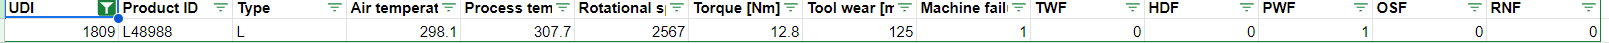

---
**Model is working well!!**
---
---


# **Conclusion**

This project successfully addressed the challenge of predicting machine failures using advanced machine learning techniques. By integrating a comprehensive dataset that included features such as temperature, rotational speed, torque, and tool wear, we developed a robust prediction model utilizing a stacking ensemble of LightGBM, Random Forest, and CatBoost classifiers. The model was further refined through feature engineering, where derived metrics such as power, temperature differences, and various interactions were calculated to capture the complexities of machine operations.

Through rigorous hyperparameter tuning using Optuna, the final model achieved impressive accuracy in classifying failure modes, providing valuable insights into operational conditions that may lead to failures. The application of the model in real-world scenarios can enhance predictive maintenance strategies, thereby reducing downtime and improving efficiency.

This project demonstrated the potential of machine learning to enhance decision-making processes in industrial settings, providing a scalable solution for continuous monitoring and proactive maintenance. Future work may explore real-time integration and further model enhancements through additional data sources and adaptive learning techniques.